<div class="alert alert-success" >
    <center><h1><font color=#4a7d52>Machine Learning Final Project</font></h1></center><br>
    <center>2022/2023</center>
</div>

# 1. Data Exploration

## 1.1 Imports

In [84]:
import pandas as pd 
import numpy as np

# data partition
from sklearn.model_selection import train_test_split

# data transformation
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# outliers
from sklearn.neighbors import LocalOutlierFactor
from scipy import stats

# feature selection

from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.svm import SVC

# models
from sklearn.model_selection import GridSearchCV #for hyperparameter optimization
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

#ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

#model selection and classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import graphviz
import pydotplus
import textwrap

# assessment
from sklearn.metrics import classification_report, confusion_matrix
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

## 1.2 Data Integration

First, we import the datasets into variables.

In [2]:
train_demo = pd.read_excel('train_demo.xlsx')
train_habits = pd.read_excel('train_habits.xlsx')
train_health = pd.read_excel('train_health.xlsx')

In [3]:
train_demo.head()

PatientID                Name  Birth_Year                    Region  \
0       1167  Mrs. Stephanie Gay        1965                    London   
1       1805    Mr. Sherman Nero        1969                South West   
2       1557     Mr. Mark Boller        1974  Yorkshire and the Humber   
3       1658    Mr. David Caffee        1958                    London   
4       1544    Mr. Gerald Emery        1968                South East   

                                     Education  Disease  
0  High School Incomplete (10th to 11th grade)        1  
1  High School Incomplete (10th to 11th grade)        1  
2         Elementary School (1st to 9th grade)        1  
3        University Complete (3 or more years)        0  
4         University Incomplete (1 to 2 years)        1

In [4]:
train_habits.head()

PatientID Smoking_Habit                       Drinking_Habit Exercise  \
0       1167            No  I usually consume alcohol every day      Yes   
1       1805            No   I consider myself a social drinker      Yes   
2       1557            No   I consider myself a social drinker       No   
3       1658            No  I usually consume alcohol every day      Yes   
4       1544            No   I consider myself a social drinker       No   

                                       Fruit_Habit  \
0  Less than 1. I do not consume fruits every day.   
1  Less than 1. I do not consume fruits every day.   
2  Less than 1. I do not consume fruits every day.   
3  Less than 1. I do not consume fruits every day.   
4                1 to 2 pieces of fruit in average   

                                      Water_Habit  
0                Between one liter and two liters  
1                Between one liter and two liters  
2  More than half a liter but less than one liter  
3  More than half a liter but less than one liter  
4  More than half a liter but less than one liter

In [5]:
train_health.head()

PatientID  Height  Weight  High_Cholesterol  Blood_Pressure  Mental_Health  \
0       1167     155      67               358             120             21   
1       1805     173      88               230             142              9   
2       1557     162      68               226             122             26   
3       1658     180      66               313             125             13   
4       1544     180      58               277             125             18   

   Physical_Health            Checkup  \
0                2  More than 3 years   
1                0           Not sure   
2                0  More than 3 years   
3                8           Not sure   
4                2  More than 3 years   

                                            Diabetes  
0   Neither I nor my immediate family have diabetes.  
1   Neither I nor my immediate family have diabetes.  
2   Neither I nor my immediate family have diabetes.  
3  I have/had pregnancy diabetes or borderline di...  
4  I have/had pregnancy diabetes or borderline di...

Merging all the datasets into a unique one based on the PatientID variable.

In [6]:
train_patient_original = pd.merge(pd.merge(train_demo, train_health, on="PatientID"), train_habits, on='PatientID')

In [7]:
train_patient = train_patient_original.copy()

Defining the PatientID as the index of our dataframe.

In [8]:
train_patient.set_index('PatientID', inplace = True)
train_patient.head()

Name  Birth_Year                    Region  \
PatientID                                                             
1167       Mrs. Stephanie Gay        1965                    London   
1805         Mr. Sherman Nero        1969                South West   
1557          Mr. Mark Boller        1974  Yorkshire and the Humber   
1658         Mr. David Caffee        1958                    London   
1544         Mr. Gerald Emery        1968                South East   

                                             Education  Disease  Height  \
PatientID                                                                 
1167       High School Incomplete (10th to 11th grade)        1     155   
1805       High School Incomplete (10th to 11th grade)        1     173   
1557              Elementary School (1st to 9th grade)        1     162   
1658             University Complete (3 or more years)        0     180   
1544              University Incomplete (1 to 2 years)        1     180   

           Weight  High_Cholesterol  Blood_Pressure  Mental_Health  \
PatientID                                                            
1167           67               358             120             21   
1805           88               230             142              9   
1557           68               226             122             26   
1658           66               313             125             13   
1544           58               277             125             18   

           Physical_Health            Checkup  \
PatientID                                       
1167                     2  More than 3 years   
1805                     0           Not sure   
1557                     0  More than 3 years   
1658                     8           Not sure   
1544                     2  More than 3 years   

                                                    Diabetes Smoking_Habit  \
PatientID                                                                    
1167        Neither I nor my immediate family have diabetes.            No   
1805        Neither I nor my immediate family have diabetes.            No   
1557        Neither I nor my immediate family have diabetes.            No   
1658       I have/had pregnancy diabetes or borderline di...            No   
1544       I have/had pregnancy diabetes or borderline di...            No   

                                Drinking_Habit Exercise  \
PatientID                                                 
1167       I usually consume alcohol every day      Yes   
1805        I consider myself a social drinker      Yes   
1557        I consider myself a social drinker       No   
1658       I usually consume alcohol every day      Yes   
1544        I consider myself a social drinker       No   

                                               Fruit_Habit  \
PatientID                                                    
1167       Less than 1. I do not consume fruits every day.   
1805       Less than 1. I do not consume fruits every day.   
1557       Less than 1. I do not consume fruits every day.   
1658       Less than 1. I do not consume fruits every day.   
1544                     1 to 2 pieces of fruit in average   

                                              Water_Habit  
PatientID                                                  
1167                     Between one liter and two liters  
1805                     Between one liter and two liters  
1557       More than half a liter but less than one liter  
1658       More than half a liter but less than one liter  
1544       More than half a liter but less than one liter

## 1.3 Initial Analysis

In [9]:
# --- Print Dataset Info ---
print('\033[36m\033[1m'+'.: Dataset Info :.')
print('\033[0m\033[36m*' * 20)
print('\033[0m'+'Total Rows:'+'\033[36m\033[1m', train_patient.shape[0])
print('\033[0m'+'Total Columns:'+'\033[36m\033[1m', train_patient.shape[1])
print('\033[0m\033[36m*' * 20)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.')
print('\033[0m\033[36m*' * 22 +'\033[0m')
train_patient.info(memory_usage = False)

.: Dataset Info :.
********************
Total Rows: 800
Total Columns: 18
********************


.: Dataset Details :.
**********************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         787 non-null    object
 4   Disease           800 non-null    int64 
 5   Height            800 non-null    int64 
 6   Weight            800 non-null    int64 
 7   High_Cholesterol  800 non-null    int64 
 8   Blood_Pressure    800 non-null    int64 
 9   Mental_Health     800 non-null    int64 
 10  Physical_Health   800 non-null    int64 
 11  Checkup           800 non-null    object
 12  Diabetes          800 non-null    object
 13  Smoking_Habit     800 non-null    object
 14  Drinking

### 1.3.1 Duplicate records

Checking if there are any duplicates in our dataframe.

In [10]:
print('\033[36m\033[1m'+'.: Duplicated Values :.')
print('\033[0m\033[36m*' * 23)
print('\033[0m', train_patient.duplicated().value_counts())

.: Duplicated Values :.
***********************
 False    800
dtype: int64


### 1.3.2 Undesireable characters

In [11]:
undesireable_char = ["!","$","%","?","*","+","_","@","€"," ","{"]
a = train_patient.replace(undesireable_char,np.nan, inplace=True)
print('\033[36m\033[1m'+'.: Undesirable Characters :.')
print('\033[0m\033[36m*' * 28)
print('\033[0m', a)

.: Undesirable Characters :.
****************************
 None


### 1.3.3 Missing values

In [12]:
total = train_patient.isnull().sum().sort_values(ascending=False)
percent = (train_patient.isnull().sum()/train_patient.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print('\033[36m\033[1m'+'.: Null Values :.')
print('\033[0m\033[36m*' * 17)
print('\033[0m', missing_data)

.: Null Values :.
*****************
                   Total  Percent
Education            13  0.01625
Name                  0  0.00000
Physical_Health       0  0.00000
Fruit_Habit           0  0.00000
Exercise              0  0.00000
Drinking_Habit        0  0.00000
Smoking_Habit         0  0.00000
Diabetes              0  0.00000
Checkup               0  0.00000
Mental_Health         0  0.00000
Birth_Year            0  0.00000
Blood_Pressure        0  0.00000
High_Cholesterol      0  0.00000
Weight                0  0.00000
Height                0  0.00000
Disease               0  0.00000
Region                0  0.00000
Water_Habit           0  0.00000


Looking for null values in the dataframe. We concluded that Education contains 13 null values.

### 1.3.4 Data Statistics

In [13]:
train_patient_num = train_patient.select_dtypes(exclude=object)
train_patient_cat = train_patient.select_dtypes(include=object)

In [14]:
train_patient_num.describe().T

count        mean        std     min      25%     50%  \
Birth_Year        800.0  1966.04375  15.421872  1855.0  1961.00  1966.0   
Disease           800.0     0.51375   0.500124     0.0     0.00     1.0   
Height            800.0   167.80625   7.976888   151.0   162.00   167.0   
Weight            800.0    67.82750  12.113470    40.0    58.00    68.0   
High_Cholesterol  800.0   249.32250  51.566631   130.0   213.75   244.0   
Blood_Pressure    800.0   131.05375  17.052693    94.0   120.00   130.0   
Mental_Health     800.0    17.34500   5.385139     0.0    13.00    18.0   
Physical_Health   800.0     4.55875   5.449189     0.0     0.00     3.0   

                     75%     max  
Birth_Year        1974.0  1993.0  
Disease              1.0     1.0  
Height             173.0   180.0  
Weight              77.0    97.0  
High_Cholesterol   280.0   568.0  
Blood_Pressure     140.0   200.0  
Mental_Health       21.0    29.0  
Physical_Health      7.0    30.0

In [15]:
train_patient_cat.describe().T

count unique                                               top  \
Name             800    799                                   Mr. Gary Miller   
Region           800     10                                     East Midlands   
Education        787      6             University Complete (3 or more years)   
Checkup          800      4                                 More than 3 years   
Diabetes         800      4  Neither I nor my immediate family have diabetes.   
Smoking_Habit    800      2                                                No   
Drinking_Habit   800      3               I usually consume alcohol every day   
Exercise         800      2                                                No   
Fruit_Habit      800      5   Less than 1. I do not consume fruits every day.   
Water_Habit      800      3                  Between one liter and two liters   

               freq  
Name              2  
Region          154  
Education       239  
Checkup         429  
Diabetes        392  
Smoking_Habit   673  
Drinking_Habit  406  
Exercise        536  
Fruit_Habit     452  
Water_Habit     364

In [16]:
train_patient[train_patient["Disease"] == 0].describe(include="all").T

count unique  \
Name                389    388   
Birth_Year        389.0    NaN   
Region              389     10   
Education           384      6   
Disease           389.0    NaN   
Height            389.0    NaN   
Weight            389.0    NaN   
High_Cholesterol  389.0    NaN   
Blood_Pressure    389.0    NaN   
Mental_Health     389.0    NaN   
Physical_Health   389.0    NaN   
Checkup             389      4   
Diabetes            389      4   
Smoking_Habit       389      2   
Drinking_Habit      389      3   
Exercise            389      2   
Fruit_Habit         389      5   
Water_Habit         389      3   

                                                               top freq  \
Name                                               Mr. Gary Miller    2   
Birth_Year                                                     NaN  NaN   
Region                                               East Midlands   78   
Education                    University Complete (3 or more years)  116   
Disease                                                        NaN  NaN   
Height                                                         NaN  NaN   
Weight                                                         NaN  NaN   
High_Cholesterol                                               NaN  NaN   
Blood_Pressure                                                 NaN  NaN   
Mental_Health                                                  NaN  NaN   
Physical_Health                                                NaN  NaN   
Checkup                                                   Not sure  241   
Diabetes          Neither I nor my immediate family have diabetes.  289   
Smoking_Habit                                                   No  318   
Drinking_Habit                  I consider myself a social drinker  225   
Exercise                                                       Yes  208   
Fruit_Habit        Less than 1. I do not consume fruits every day.  126   
Water_Habit                       Between one liter and two liters  174   

                         mean        std     min     25%     50%     75%  \
Name                      NaN        NaN     NaN     NaN     NaN     NaN   
Birth_Year        1963.524422  16.521543  1859.0  1960.0  1964.0  1970.0   
Region                    NaN        NaN     NaN     NaN     NaN     NaN   
Education                 NaN        NaN     NaN     NaN     NaN     NaN   
Disease                   0.0        0.0     0.0     0.0     0.0     0.0   
Height             169.205656   7.339265   151.0   165.0   171.0   174.0   
Weight              65.647815  11.688477    40.0    56.0    64.0    73.0   
High_Cholesterol   253.313625   47.96739   135.0   220.0   252.0   287.0   
Blood_Pressure     133.974293  18.546941   100.0   120.0   130.0   144.0   
Mental_Health       15.033419   5.301859     0.0    12.0    16.0    19.0   
Physical_Health      7.030848   6.153456     0.0     2.0     6.0    11.0   
Checkup                   NaN        NaN     NaN     NaN     NaN     NaN   
Diabetes                  NaN        NaN     NaN     NaN     NaN     NaN   
Smoking_Habit             NaN        NaN     NaN     NaN     NaN     NaN   
Drinking_Habit            NaN        NaN     NaN     NaN     NaN     NaN   
Exercise                  NaN        NaN     NaN     NaN     NaN     NaN   
Fruit_Habit               NaN        NaN     NaN     NaN     NaN     NaN   
Water_Habit               NaN        NaN     NaN     NaN     NaN     NaN   

                     max  
Name                 NaN  
Birth_Year        1987.0  
Region               NaN  
Education            NaN  
Disease              0.0  
Height             180.0  
Weight              97.0  
High_Cholesterol   413.0  
Blood_Pressure     200.0  
Mental_Health       28.0  
Physical_Health     30.0  
Checkup              NaN  
Diabetes             NaN  
Smoking_Habit        NaN  
Drinking_Habit       NaN  
Exercise             NaN  
Fruit_Habit          NaN  
Water_Habit   

In [17]:
train_patient[train_patient["Disease"] == 1].describe(include="all").T

count unique  \
Name                411    411   
Birth_Year        411.0    NaN   
Region              411     10   
Education           403      6   
Disease           411.0    NaN   
Height            411.0    NaN   
Weight            411.0    NaN   
High_Cholesterol  411.0    NaN   
Blood_Pressure    411.0    NaN   
Mental_Health     411.0    NaN   
Physical_Health   411.0    NaN   
Checkup             411      4   
Diabetes            411      4   
Smoking_Habit       411      2   
Drinking_Habit      411      3   
Exercise            411      2   
Fruit_Habit         411      5   
Water_Habit         411      3   

                                                                top freq  \
Name                                             Mrs. Stephanie Gay    1   
Birth_Year                                                      NaN  NaN   
Region                                                East Midlands   76   
Education                     University Complete (3 or more years)  123   
Disease                                                         NaN  NaN   
Height                                                          NaN  NaN   
Weight                                                          NaN  NaN   
High_Cholesterol                                                NaN  NaN   
Blood_Pressure                                                  NaN  NaN   
Mental_Health                                                   NaN  NaN   
Physical_Health                                                 NaN  NaN   
Checkup                                           More than 3 years  324   
Diabetes          I have/had pregnancy diabetes or borderline di...  155   
Smoking_Habit                                                    No  355   
Drinking_Habit                  I usually consume alcohol every day  250   
Exercise                                                         No  355   
Fruit_Habit         Less than 1. I do not consume fruits every day.  326   
Water_Habit                        Between one liter and two liters  190   

                         mean        std     min     25%     50%     75%  \
Name                      NaN        NaN     NaN     NaN     NaN     NaN   
Birth_Year        1968.428224  13.908642  1855.0  1963.0  1970.0  1977.0   
Region                    NaN        NaN     NaN     NaN     NaN     NaN   
Education                 NaN        NaN     NaN     NaN     NaN     NaN   
Disease                   1.0        0.0     1.0     1.0     1.0     1.0   
Height             166.481752   8.331342   151.0   158.0   167.0   173.0   
Weight              69.890511  12.161121    41.0    61.0    71.0    79.0   
High_Cholesterol   245.545012  54.545482   130.0   211.0   238.0   272.0   
Blood_Pressure     128.289538  15.013697    94.0   120.0   130.0   138.0   
Mental_Health       19.532847   4.477125     5.0    17.0    20.0    23.0   
Physical_Health      2.218978    3.27827     0.0     0.0     0.0     4.0   
Checkup                   NaN        NaN     NaN     NaN     NaN     NaN   
Diabetes                  NaN        NaN     NaN     NaN     NaN     NaN   
Smoking_Habit             NaN        NaN     NaN     NaN     NaN     NaN   
Drinking_Habit            NaN        NaN     NaN     NaN     NaN     NaN   
Exercise                  NaN        NaN     NaN     NaN     NaN     NaN   
Fruit_Habit               NaN        NaN     NaN     NaN     NaN     NaN   
Water_Habit               NaN        NaN     NaN     NaN     NaN     NaN   

                     max  
Name                 NaN  
Birth_Year        1993.0  
Region               NaN  
Education            NaN  
Disease              1.0  
Height             180.0  
Weight              97.0  
High_Cholesterol   568.0  
Blood_Pressure     180.0  
Mental_Health       29.0  
Physical_Health     20.0  
Checkup              NaN  
Diabetes             NaN  
Smoking_Habit        NaN  
Drinking_Habit       NaN  
Exercise             NaN  
Fruit_Habit          N

In [18]:
train_patient.groupby("Disease").mean()

Birth_Year      Height     Weight  High_Cholesterol  Blood_Pressure  \
Disease                                                                         
0        1963.524422  169.205656  65.647815        253.313625      133.974293   
1        1968.428224  166.481752  69.890511        245.545012      128.289538   

         Mental_Health  Physical_Health  
Disease                                  
0            15.033419         7.030848  
1            19.532847         2.218978

## 1.4 Visual Analysis

### 1.4.1 Plot Formatting

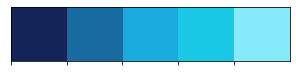

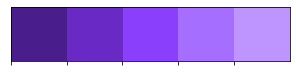

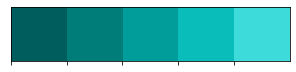

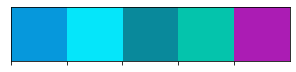

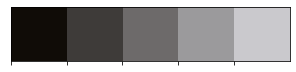

In [19]:
cyan_grad = ['#142459', '#176BA0', '#19AADE', '#1AC9E6', '#87EAFA']
purple_grad = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF', '#BE95FF']
teal_grad = ['#005D5D', '#007D79', '#009D9A', '#08BDBA', '#3DDBD9']
color_mix = ['#0698DC', '#05E6FA', '#09899B', '#04C4AC', '#AB1CB4']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes ---
sns.palplot(cyan_grad)
sns.palplot(purple_grad)
sns.palplot(teal_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

### 1.4.2 Categorical Variables Exploration

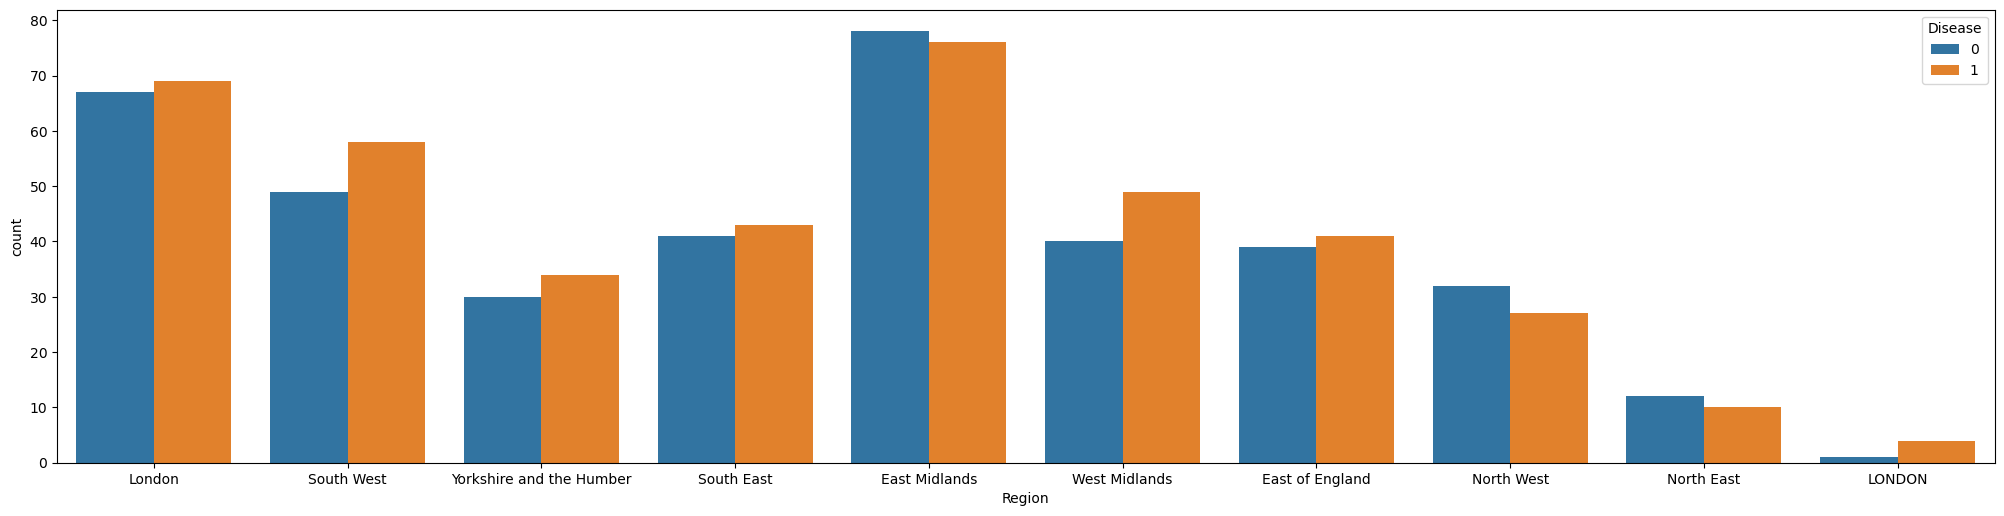

In [37]:
plt.figure(figsize=(25, 6), dpi=100)
sns.countplot(x = 'Region', hue = "Disease", data = train_patient)
plt.savefig('Figures/BarChart_Region.png', dpi=100, bbox_inches='tight')
plt.show()

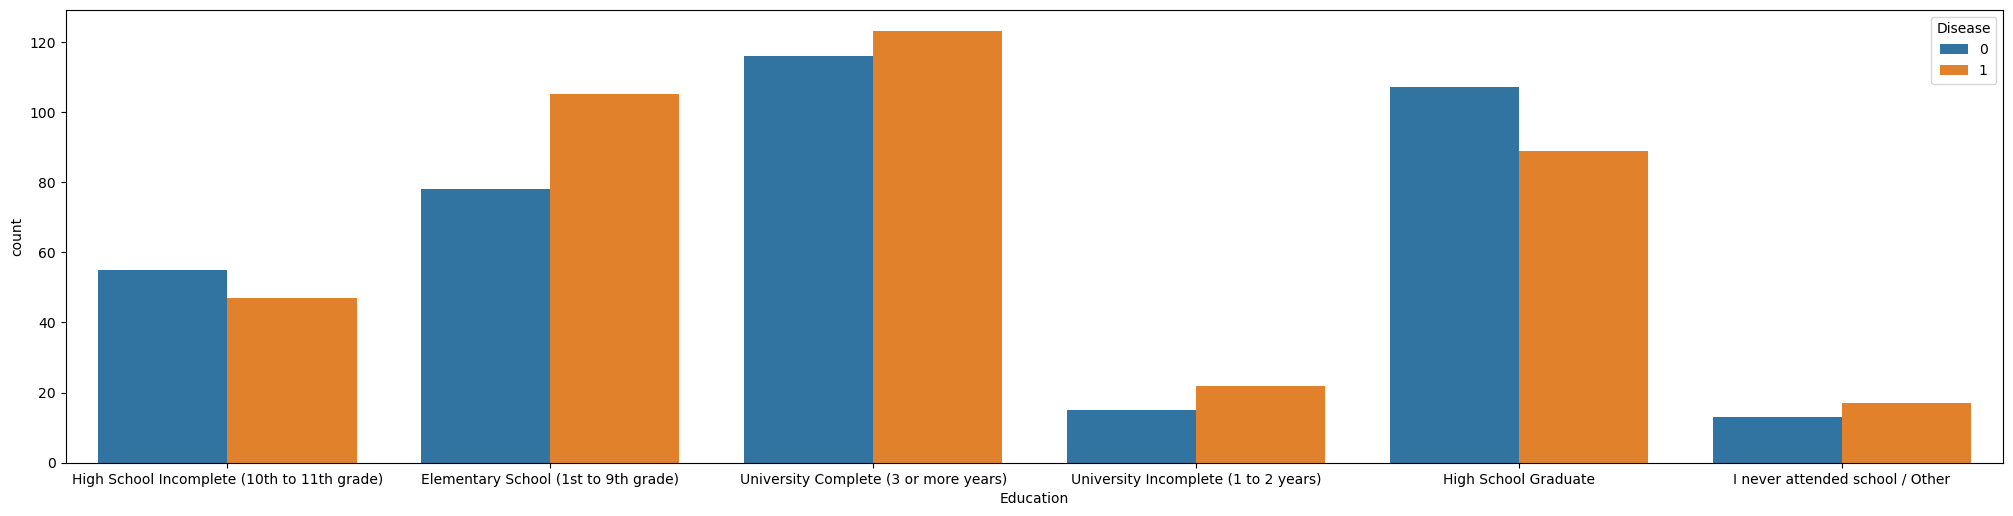

In [38]:
plt.figure(figsize=(25, 6), dpi=100)
sns.countplot(x = 'Education', hue = "Disease", data = train_patient)
plt.savefig('Figures/BarChart_Education.png', dpi=100, bbox_inches='tight')
plt.show()

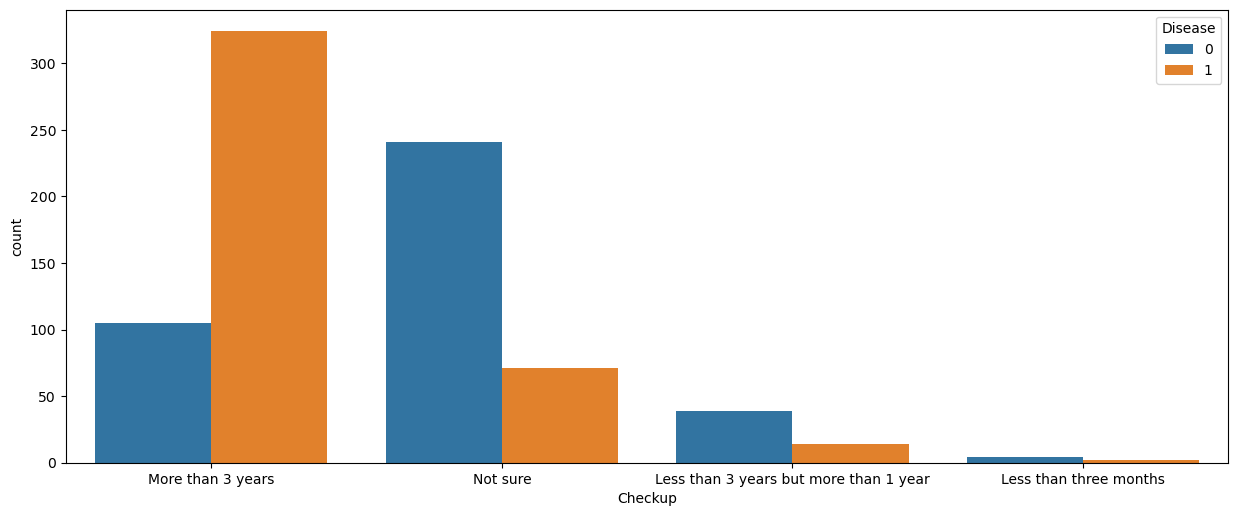

In [39]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = 'Checkup', hue = "Disease", data = train_patient)
plt.savefig('Figures/BarChart_Checkup.png', dpi=100, bbox_inches='tight')
plt.show()

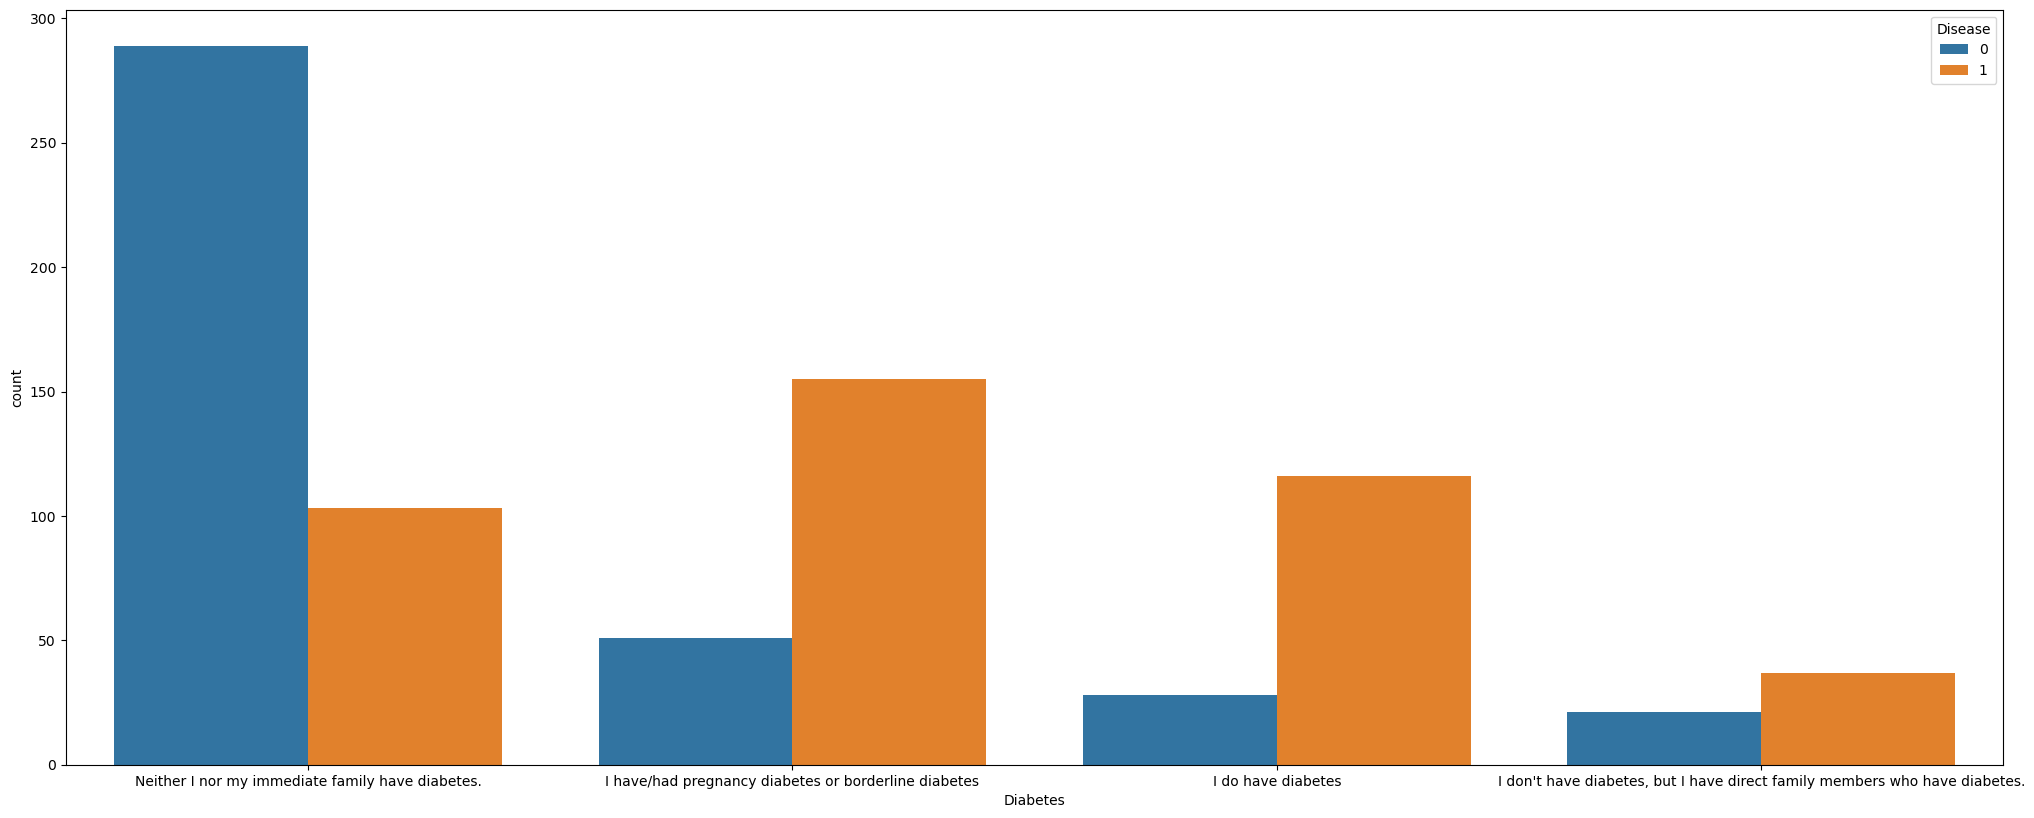

In [40]:
plt.figure(figsize=(25, 10), dpi=100)
sns.countplot(x = 'Diabetes', hue = "Disease", data = train_patient)
plt.savefig('Figures/BarChart_Diabetes.png', dpi=100, bbox_inches='tight')
plt.show()

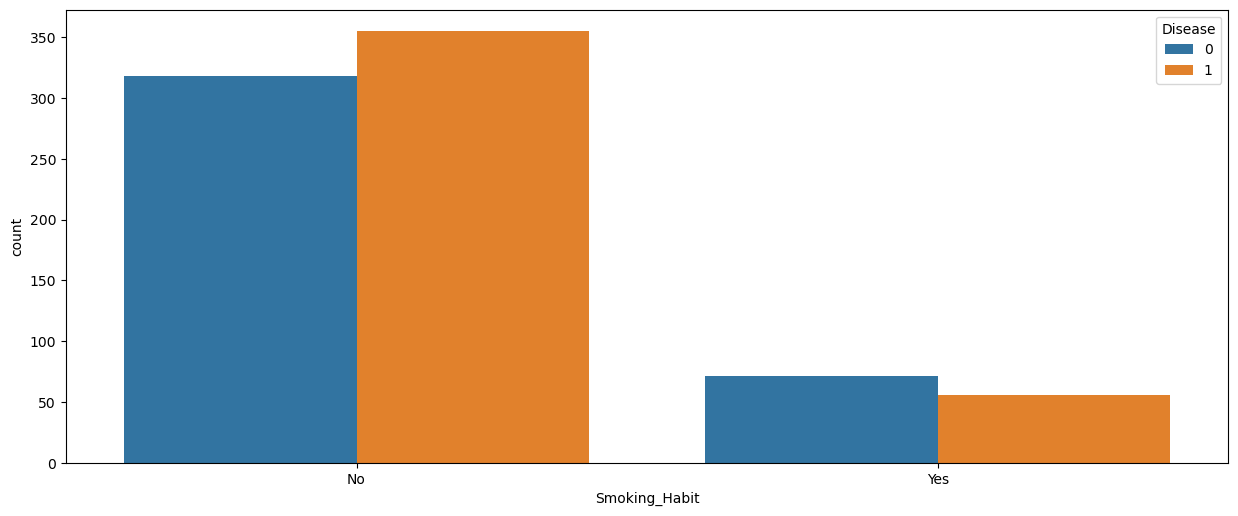

In [41]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = 'Smoking_Habit', hue = "Disease", data = train_patient)
plt.savefig('Figures/BarChart_Smoking_Habit.png', dpi=100, bbox_inches='tight')
plt.show()

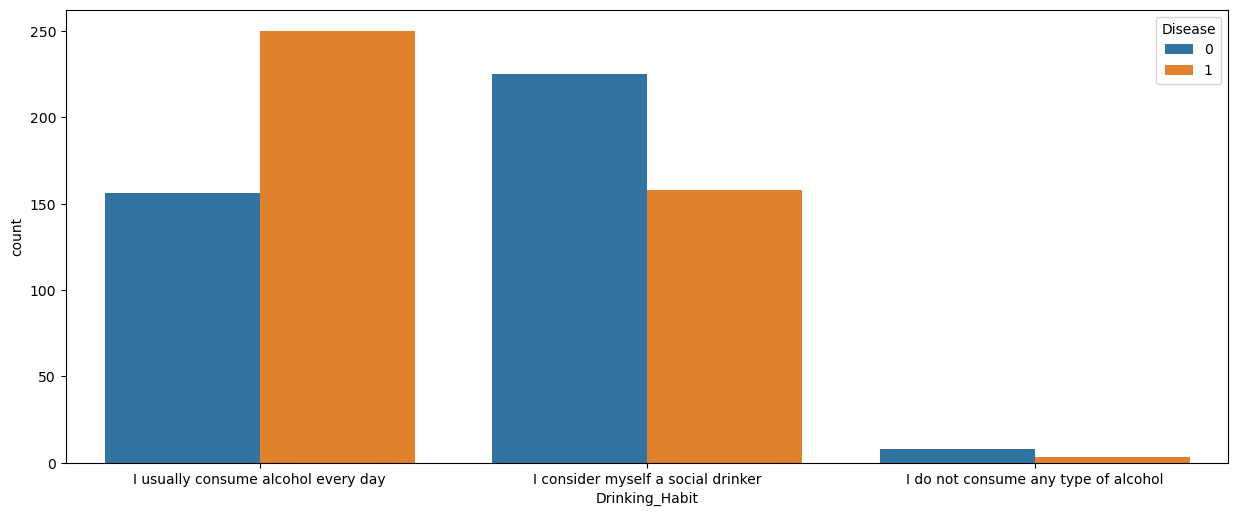

In [42]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = 'Drinking_Habit', hue = "Disease", data = train_patient)
plt.savefig('Figures/BarChart_Drinking_Habit.png', dpi=100, bbox_inches='tight')
plt.show()

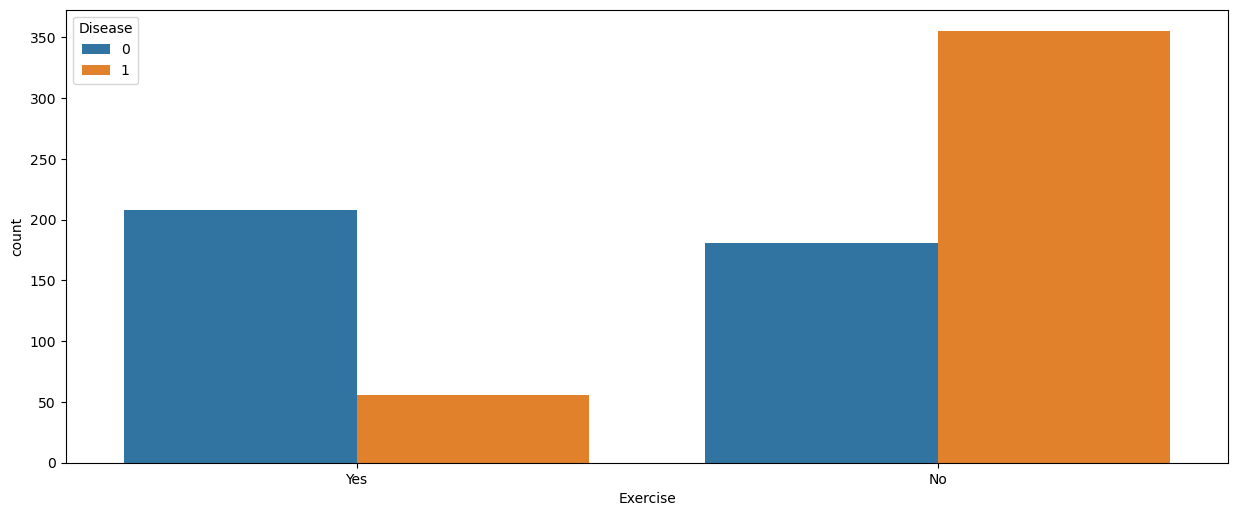

In [43]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = 'Exercise', hue = "Disease", data = train_patient)
plt.savefig('Figures/BarChart_Exercise.png', dpi=100, bbox_inches='tight')
plt.show()

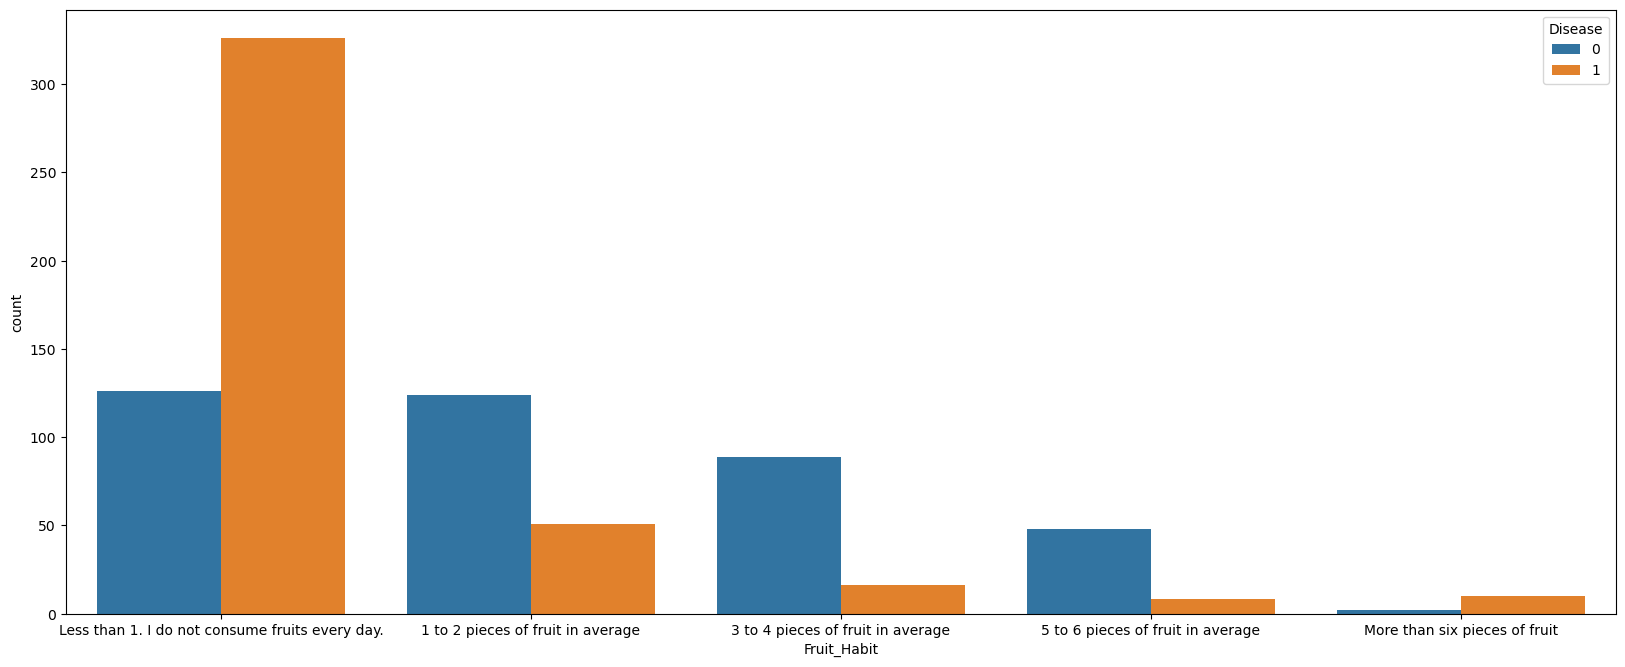

In [46]:
plt.figure(figsize=(20, 8), dpi=100)
sns.countplot(x = 'Fruit_Habit', hue = "Disease", data = train_patient)
plt.savefig('Figures/BarChart_Fruit_Habit.png', dpi=100, bbox_inches='tight')
plt.show()

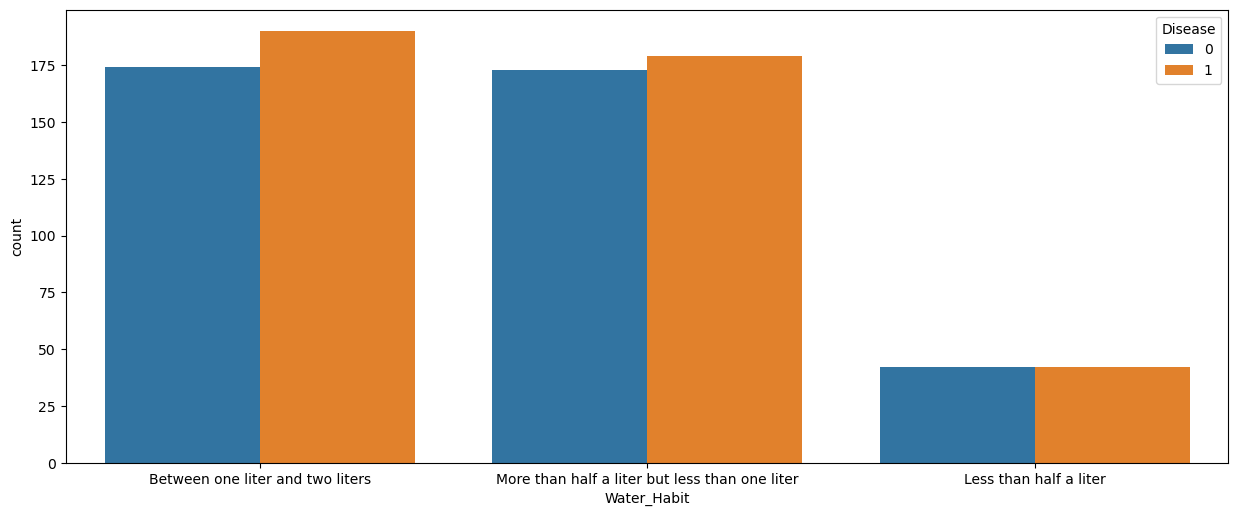

In [47]:
plt.figure(figsize=(15,6), dpi=100)
sns.countplot(x = 'Water_Habit', hue = "Disease", data = train_patient)
plt.savefig('Figures/BarChart_Water_Habit.png', dpi=100, bbox_inches='tight')
plt.show()

### 1.4.3 Groups Creation and Interpretation

In [48]:
def Colesterol_categorise(df):
    train_patient['Cholesterol_Cat'] = pd.cut(train_patient.High_Cholesterol, bins = [0,200,240,float("inf")], labels = ['Desirable','Borderline High','High'])
    
Colesterol_categorise(train_patient)
train_patient['Cholesterol_Cat'].dtype

CategoricalDtype(categories=['Desirable', 'Borderline High', 'High'], ordered=True)

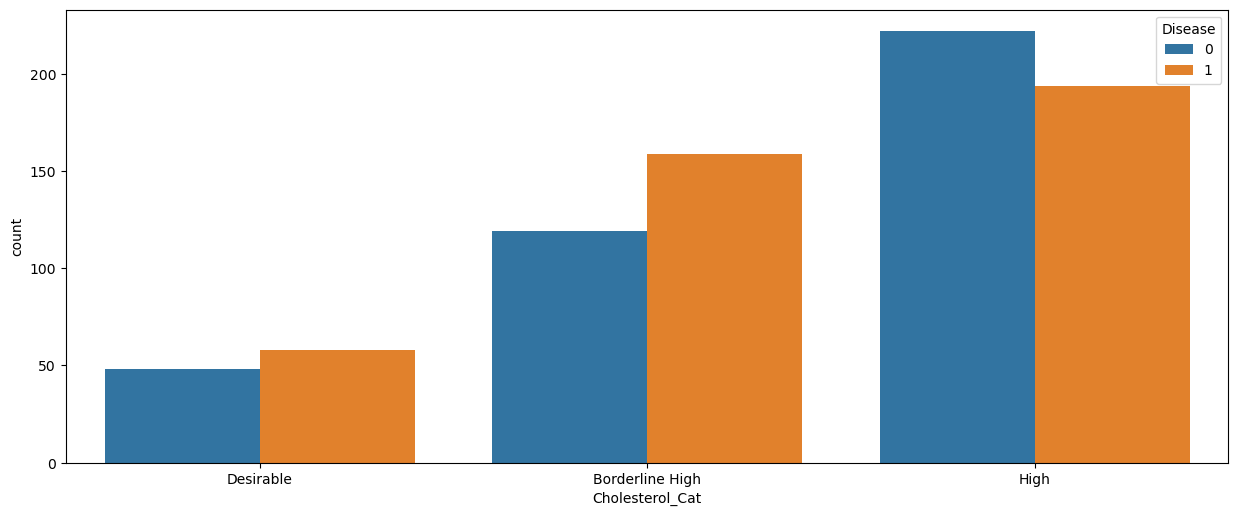

In [49]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = "Cholesterol_Cat", hue = "Disease", data = train_patient)
plt.show()

In [50]:
Cholesterol_Cat_counts = pd.DataFrame(train_patient['Cholesterol_Cat'].value_counts())
Cholesterol_Cat_counts['%'] = (train_patient["Cholesterol_Cat"].value_counts()/len(train_patient["Cholesterol_Cat"])*100).round(2)
Cholesterol_Cat_counts.style.set_caption("Cholesterol Categories")
Cholesterol_Cat_counts

Cholesterol_Cat      %
High                         416  52.00
Borderline High              278  34.75
Desirable                    106  13.25

In [51]:
train_patient.Mental_Health.describe()

count    800.000000
mean      17.345000
std        5.385139
min        0.000000
25%       13.000000
50%       18.000000
75%       21.000000
max       29.000000
Name: Mental_Health, dtype: float64

In [52]:
def Mental_Health_categorise(df):
    train_patient['Mental_Health_Cat'] = pd.qcut(train_patient.Mental_Health, q=4, labels = ['Good','Medium','Bad','Very bad'])
    
Mental_Health_categorise(train_patient)
train_patient['Mental_Health_Cat'].dtype

CategoricalDtype(categories=['Good', 'Medium', 'Bad', 'Very bad'], ordered=True)

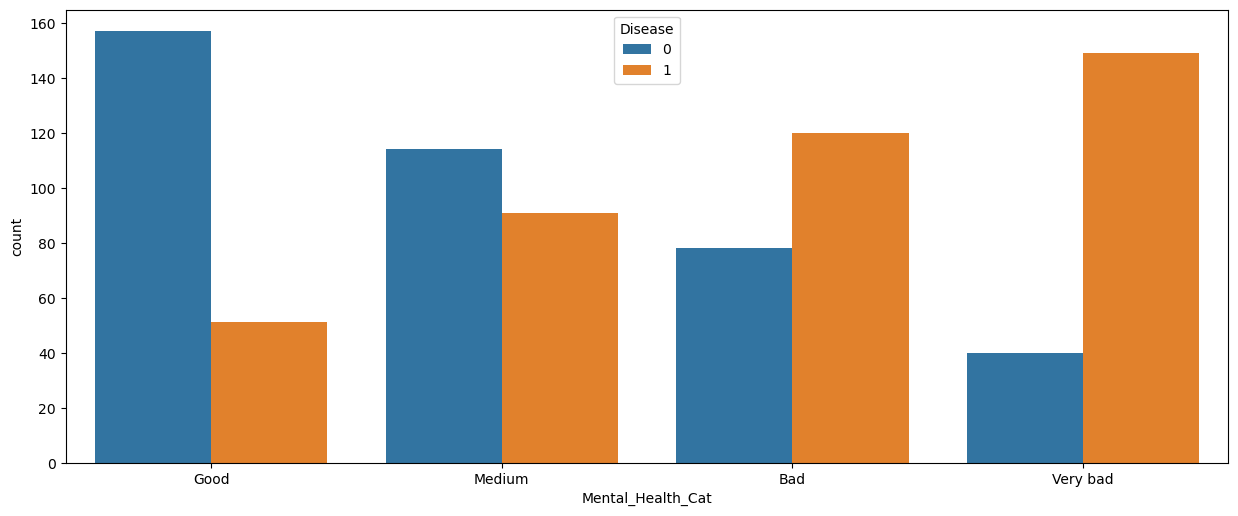

In [53]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = "Mental_Health_Cat", hue = "Disease", data = train_patient)
plt.show()

In [54]:
Mental_Health_Cat_counts = pd.DataFrame(train_patient['Mental_Health_Cat'].value_counts())
Mental_Health_Cat_counts['%'] = (train_patient["Mental_Health_Cat"].value_counts()/len(train_patient["Mental_Health_Cat"])*100).round(2)
Mental_Health_Cat_counts

Mental_Health_Cat      %
Good                    208  26.00
Medium                  205  25.62
Bad                     198  24.75
Very bad                189  23.62

In [55]:
train_patient.Physical_Health.describe()

count    800.000000
mean       4.558750
std        5.449189
min        0.000000
25%        0.000000
50%        3.000000
75%        7.000000
max       30.000000
Name: Physical_Health, dtype: float64

<Figure size 2250x2250 with 0 Axes>

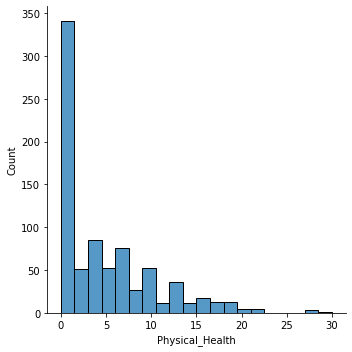

In [56]:
plt.figure(figsize=(15, 15), dpi=150)
sns.displot(train_patient, x="Physical_Health")

In [57]:
train_patient.Blood_Pressure.describe()

count    800.000000
mean     131.053750
std       17.052693
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: Blood_Pressure, dtype: float64

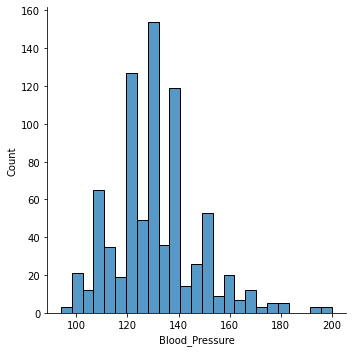

In [58]:
sns.displot(train_patient, x="Blood_Pressure")

In [59]:
def Blood_Pressure_categorise(df):
    train_patient['Blood_Pressure_Cat'] = pd.qcut(train_patient.Blood_Pressure, q=4, labels = ['Low',"Regular","High","Very High"])
    
Blood_Pressure_categorise(train_patient)
train_patient['Blood_Pressure_Cat'].dtype

CategoricalDtype(categories=['Low', 'Regular', 'High', 'Very High'], ordered=True)

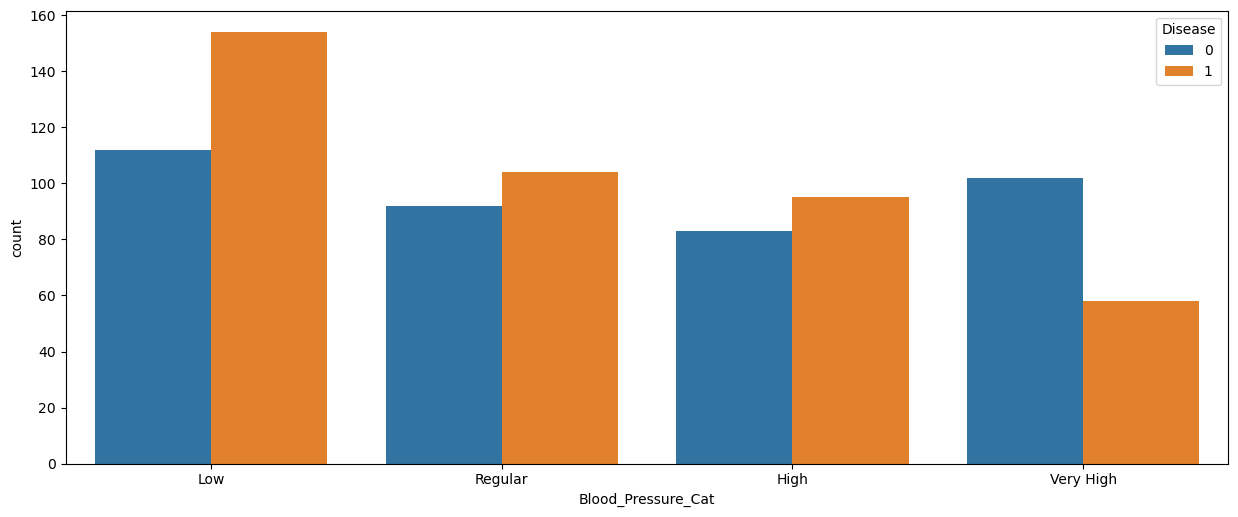

In [60]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = "Blood_Pressure_Cat", hue = "Disease", data = train_patient)
plt.show()

In [61]:
Blood_Pressure_Cat_counts = pd.DataFrame(train_patient['Blood_Pressure_Cat'].value_counts())
Blood_Pressure_Cat_counts['%'] = (train_patient["Blood_Pressure_Cat"].value_counts()/len(train_patient["Blood_Pressure_Cat"])*100).round(2)
Blood_Pressure_Cat_counts

Blood_Pressure_Cat      %
Low                       266  33.25
Regular                   196  24.50
High                      178  22.25
Very High                 160  20.00

## 2. Data Preprocessing

### 2.1 Coherence checking

Mental and Physical health variables refer only to the last 30 days, therefore none of them should have a value greater than 30 or smaller than 0.

In [62]:
print("The maximum number of days in which a person had mental difficulties was", train_patient["Mental_Health"].max(), "and the least number of days was", train_patient["Mental_Health"].min())

The maximum number of days in which a person had mental difficulties was 29 and the least number of days was 0


In [63]:
print("The maximum number of days in which a person had physical difficulties was", train_patient["Physical_Health"].max(), "and the least number of days was", train_patient["Physical_Health"].min())

The maximum number of days in which a person had physical difficulties was 30 and the least number of days was 0


In [64]:
train_patient["Region"].value_counts()

East Midlands               154
London                      136
South West                  107
West Midlands                89
South East                   84
East of England              80
Yorkshire and the Humber     64
North West                   59
North East                   22
LONDON                        5
Name: Region, dtype: int64

We can see that there is value were London is written in CAPS LOCK. This is something we must take care of.

In [65]:
train_patient.replace(to_replace="LONDON", value="London", inplace=True, limit=None)

In [66]:
train_patient["Region"].value_counts()

East Midlands               154
London                      141
South West                  107
West Midlands                89
South East                   84
East of England              80
Yorkshire and the Humber     64
North West                   59
North East                   22
Name: Region, dtype: int64

### 2.2 Feature Engineering

Creating a gender variable based on the prefix in the Name.

In [67]:
#Create variable Gender
gender = []

for elem in train_patient['Name']:
        if "Mr." in elem:
            gender.append("M")
    
        elif "Miss" or "Mrs." in elem:
            gender.append("F")
    
gender = np.asarray(gender)

train_patient['Gender'] = gender

print(train_patient['Gender'])

PatientID
1167    F
1805    M
1557    M
1658    M
1544    M
       ..
1909    M
1386    F
1088    F
1662    M
1117    M
Name: Gender, Length: 800, dtype: object


Converting the Birth Year to Age by subtracting it to the current Year.

In [68]:
train_patient['Age'] = datetime.now().year - train_patient['Birth_Year'] 
print(train_patient['Age'])

PatientID
1167     57
1805     53
1557     48
1658     64
1544     54
       ... 
1909     50
1386     42
1088    162
1662     47
1117     43
Name: Age, Length: 800, dtype: int64


Creating a variable of Body Mass Index using the Weight and Height variables.

In [69]:
#Create variable BMI     
train_patient['BMI'] = (train_patient['Weight']/(train_patient['Height']**2)*10000).round(2)

print(train_patient['BMI'])

PatientID
1167    27.89
1805    29.40
1557    25.91
1658    20.37
1544    17.90
        ...  
1909    19.25
1386    24.75
1088    17.21
1662    27.55
1117    23.39
Name: BMI, Length: 800, dtype: float64


In [70]:
train_patient.BMI.describe()

count    800.000000
mean      24.039500
std        3.658627
min       16.980000
25%       20.830000
50%       24.380000
75%       27.145000
max       30.120000
Name: BMI, dtype: float64

In [71]:
def BMI_categorise(df):
     train_patient['BMI_Cat'] = pd.cut(train_patient.BMI, bins = [0,18.5,25,30,float("inf")], labels = ['Underweight','Healthy','Overweight','Obesity'])
                                                                                                               
BMI_categorise(train_patient)
train_patient['BMI_Cat'].dtype

CategoricalDtype(categories=['Underweight', 'Healthy', 'Overweight', 'Obesity'], ordered=True)

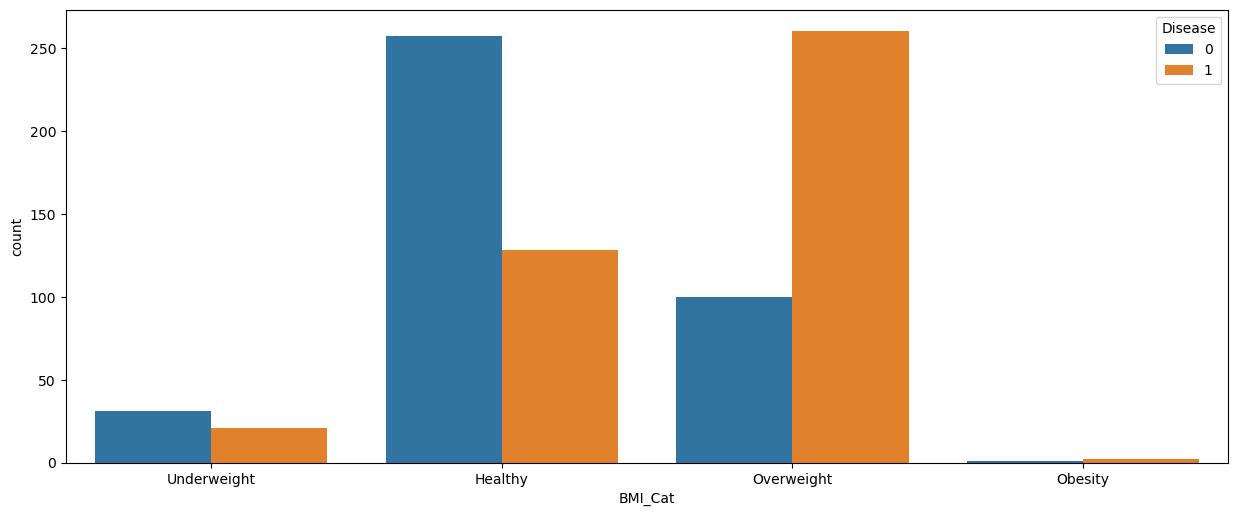

In [72]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = "BMI_Cat", hue = "Disease", data = train_patient)
plt.show()

### 2.3 Treating Missing Values

As we have seen, the only variable which had missing values was Education. Since it is a categorical variable, we will now fill the missing values using the mode.

In [73]:
train_patient['Education'].fillna(train_patient['Education'].mode()[0], inplace=True)

Checking that we no longer have missing values.

In [74]:
train_patient.isna().sum()

Name                  0
Birth_Year            0
Region                0
Education             0
Disease               0
Height                0
Weight                0
High_Cholesterol      0
Blood_Pressure        0
Mental_Health         0
Physical_Health       0
Checkup               0
Diabetes              0
Smoking_Habit         0
Drinking_Habit        0
Exercise              0
Fruit_Habit           0
Water_Habit           0
Cholesterol_Cat       0
Mental_Health_Cat     0
Blood_Pressure_Cat    0
Gender                0
Age                   0
BMI                   0
BMI_Cat               0
dtype: int64

### 2.4 Outlier analysis

Modifying the previously created variable for all the numerical features by replacing Birth_Year by Age and removing the dependent variable.

In [75]:
train_patient_num.drop(["Birth_Year", "Disease"],axis = 1, inplace=True)
train_patient_num["Age"] = train_patient['Age']
train_patient_num

Height  Weight  High_Cholesterol  Blood_Pressure  Mental_Health  \
PatientID                                                                    
1167          155      67               358             120             21   
1805          173      88               230             142              9   
1557          162      68               226             122             26   
1658          180      66               313             125             13   
1544          180      58               277             125             18   
...           ...     ...               ...             ...            ...   
1909          178      61               204             144             12   
1386          157      61               213             120             23   
1088          167      48               272             140             20   
1662          165      75               208             112             16   
1117          173      70               181             120             11   

           Physical_Health  Age  
PatientID                        
1167                     2   57  
1805                     0   53  
1557                     0   48  
1658                     8   64  
1544                     2   54  
...                    ...  ...  
1909                     4   50  
1386                     0   42  
1088                    17  162  
1662                     0   47  
1117                    12   43  

[800 rows x 7 columns]

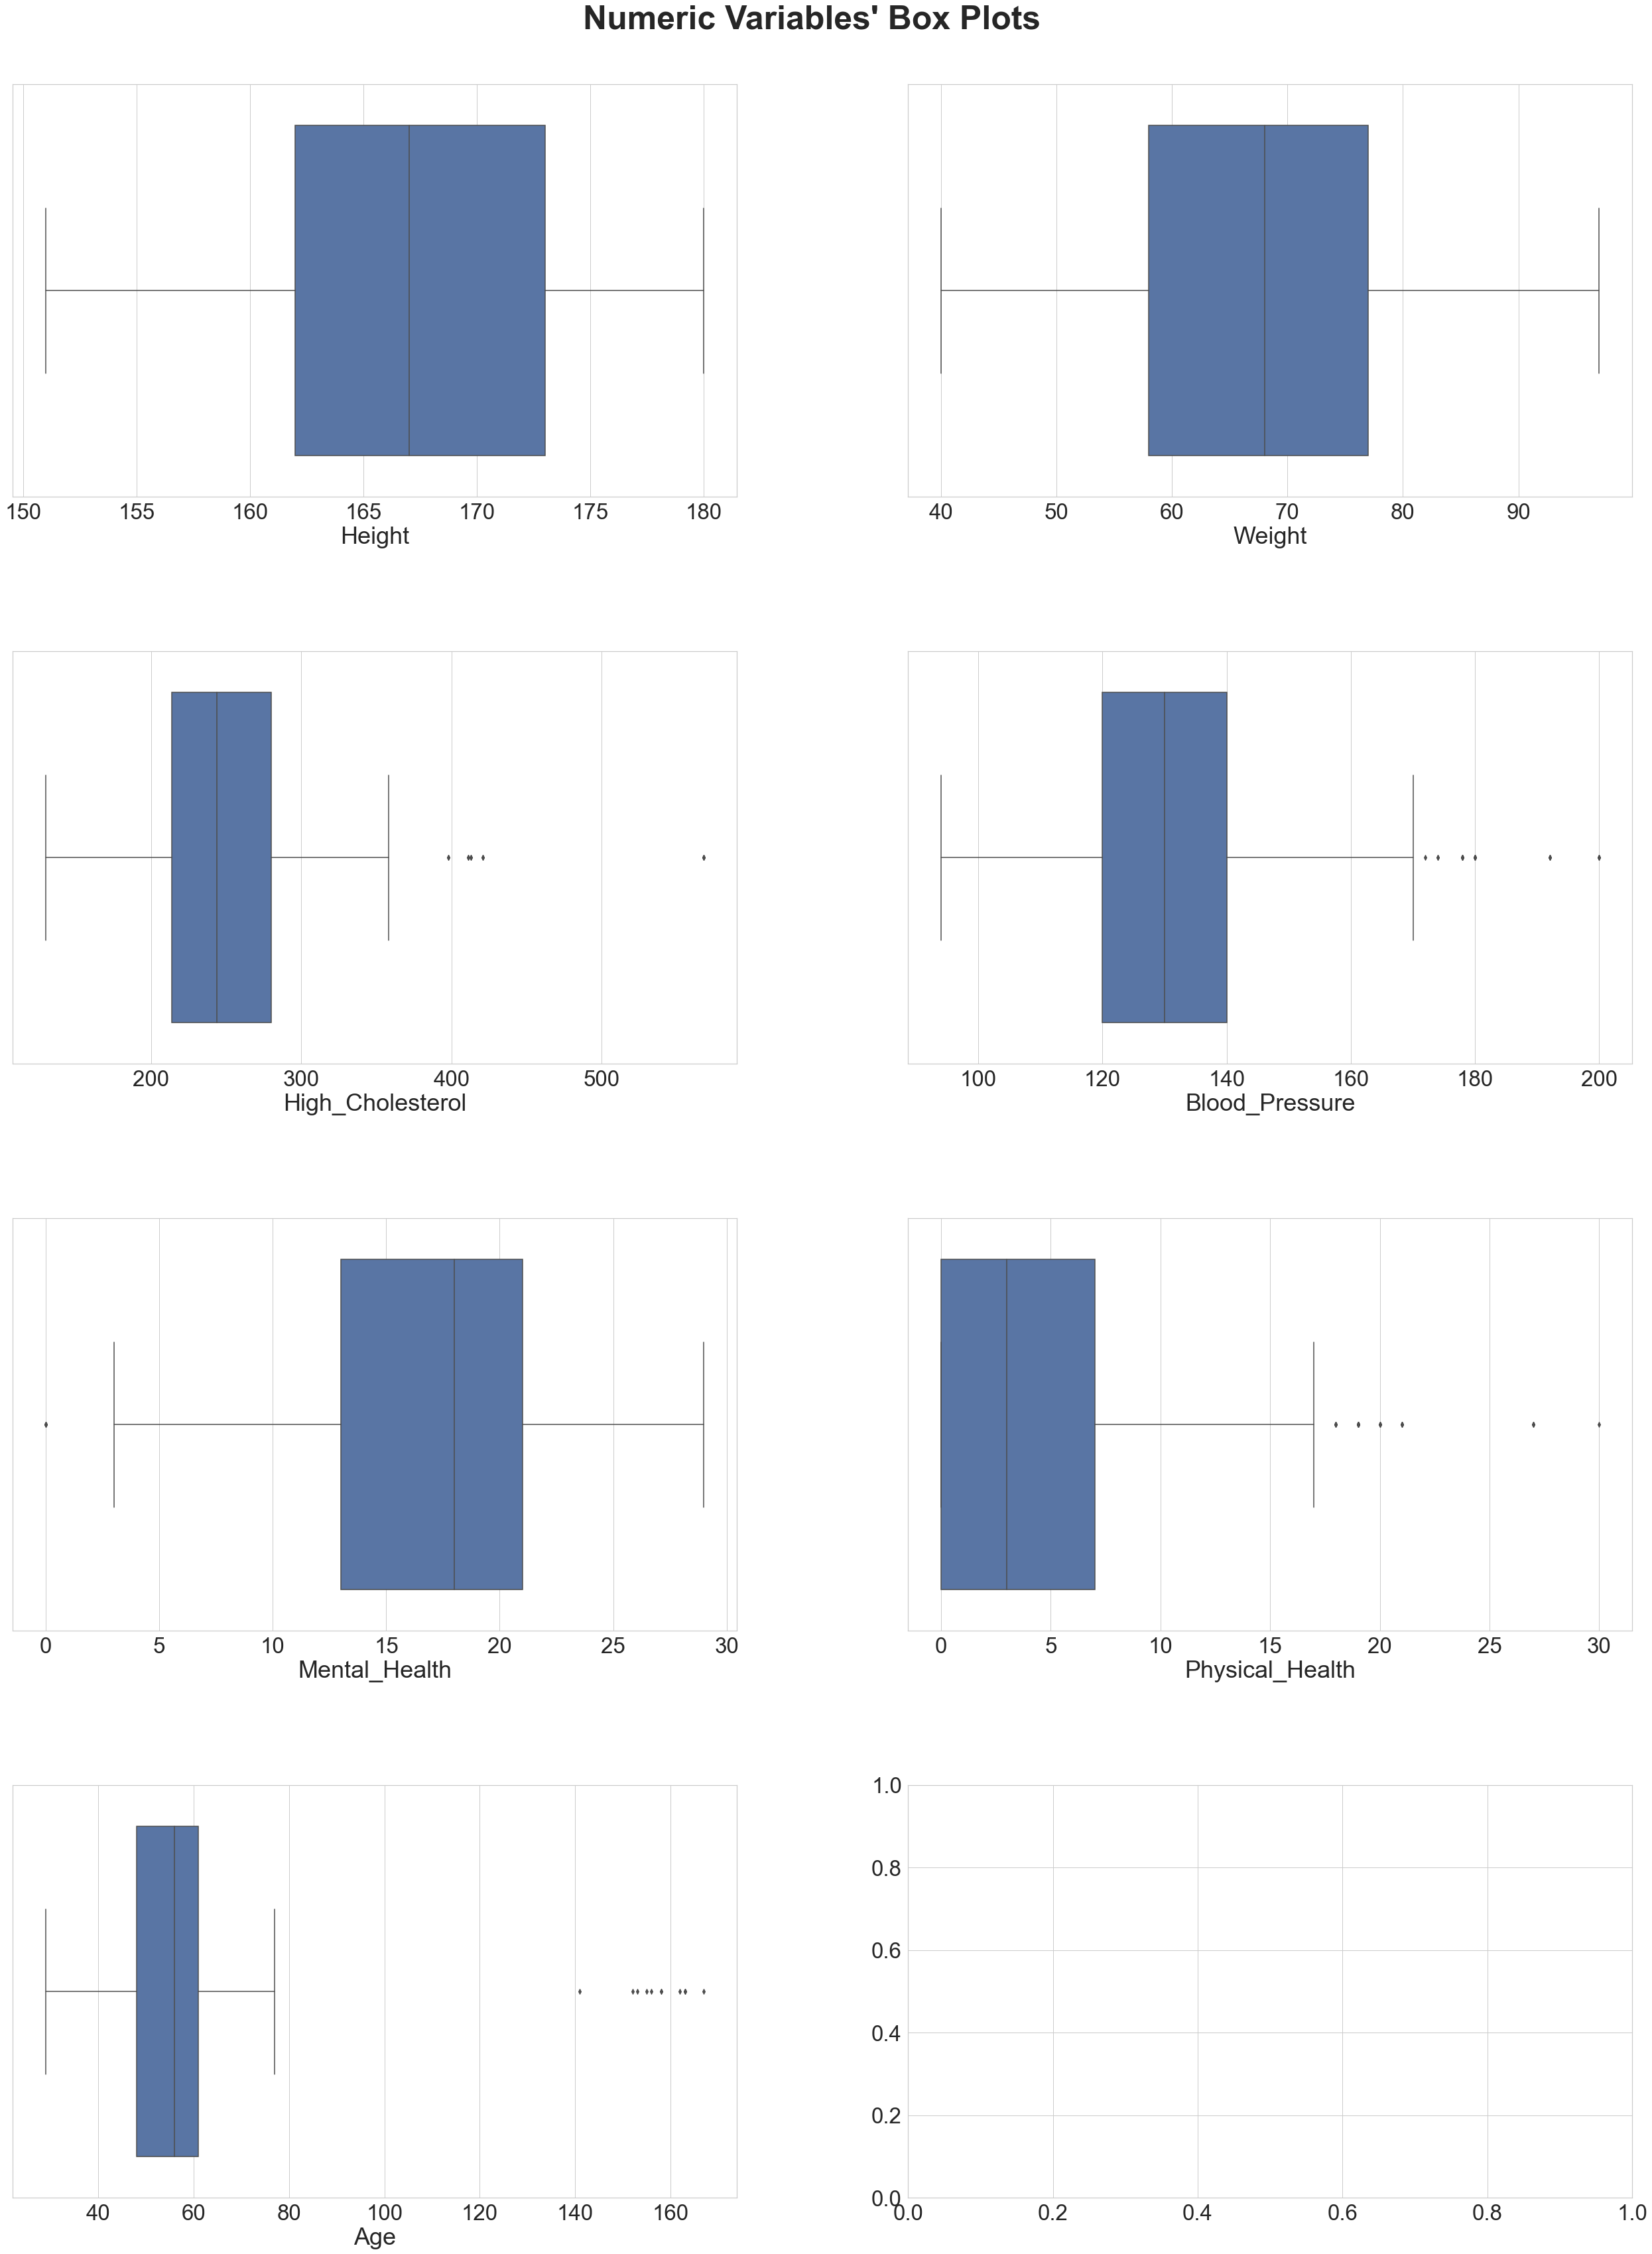

In [76]:
sns.set(font_scale=3)
sns.set_style("whitegrid")

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(4, ceil(len(list(train_patient_num.columns.values)) / 5), figsize=(40, 50))
plt.tight_layout(pad=5)

# Plot data
for ax, feat in zip(axes.flatten(), list(train_patient_num.columns.values)):
    sns.boxplot(x=train_patient[feat], 
                ax=ax)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title, fontsize=50, fontweight="bold")

plt.show()

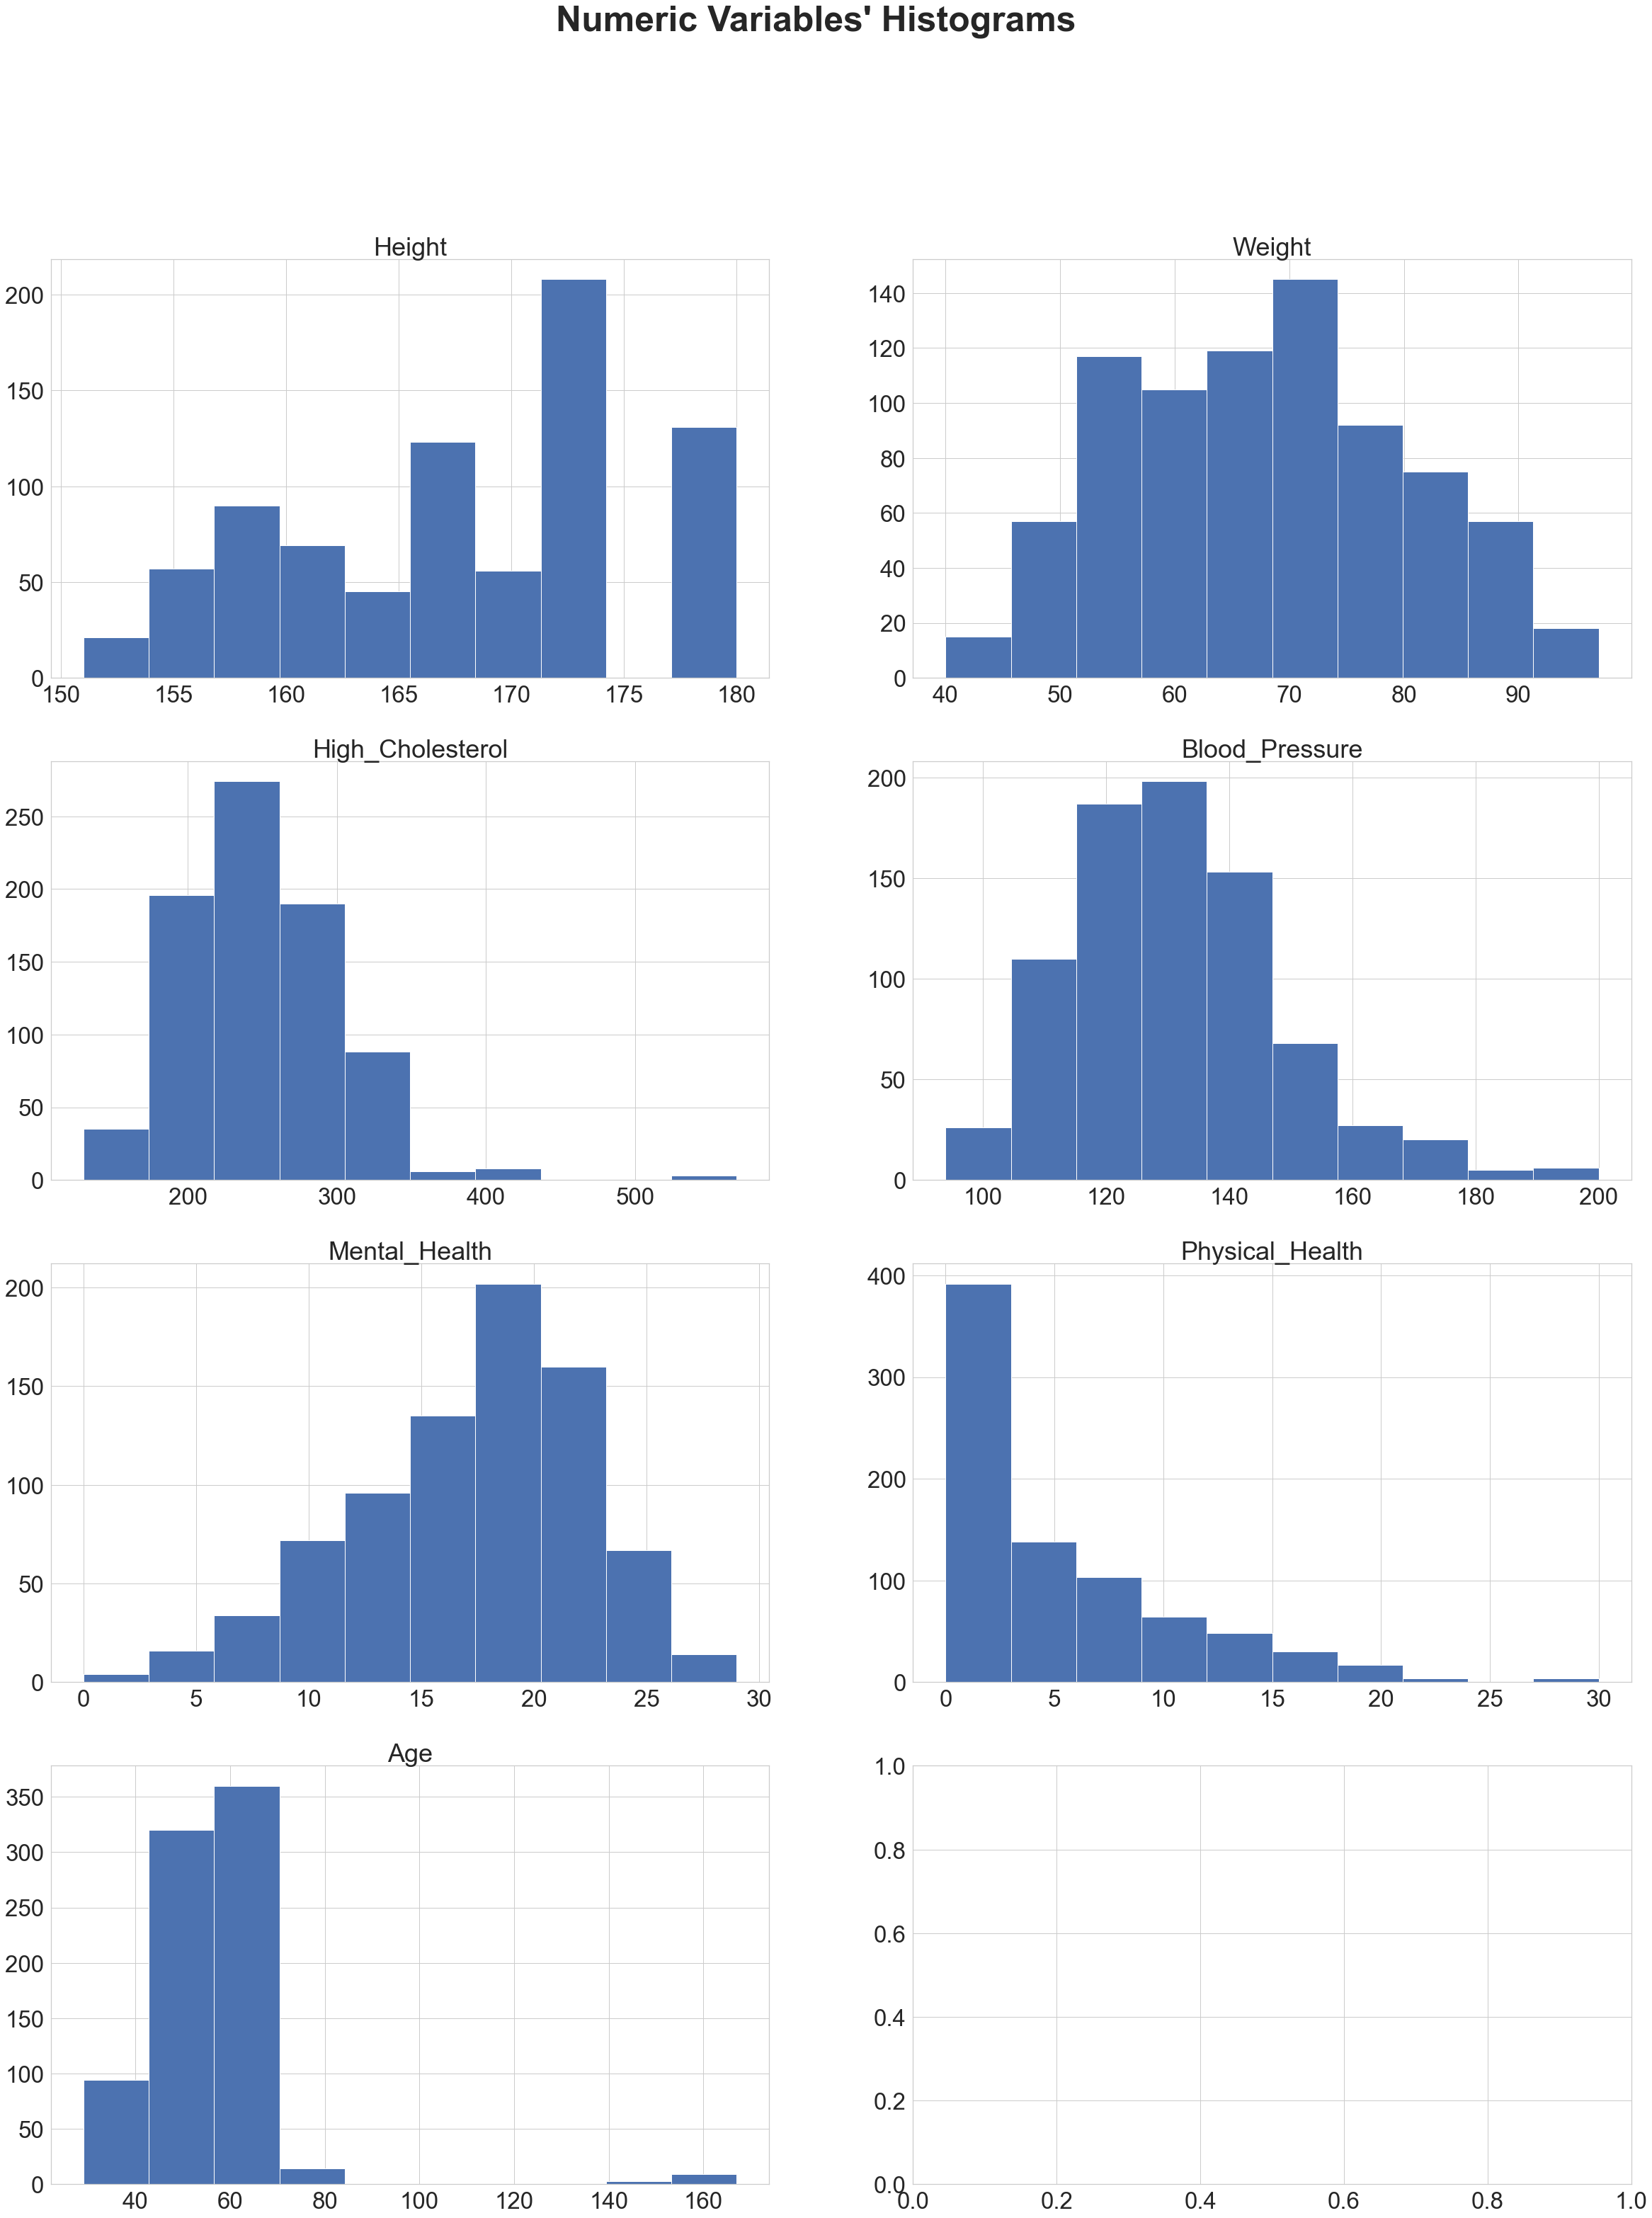

In [77]:
# All Numeric Variables' Histograms in one figure
sns.set(font_scale=3)
sns.set_style("whitegrid")

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(4, ceil(len(list(train_patient_num.columns.values)) / 5), figsize=(40, 50))

# Plot data
for ax, feat in zip(axes.flatten(),list(train_patient_num.columns.values)):
    ax.hist(train_patient[feat])
    ax.set_title(feat)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title, fontsize=50, fontweight="bold")

plt.show()

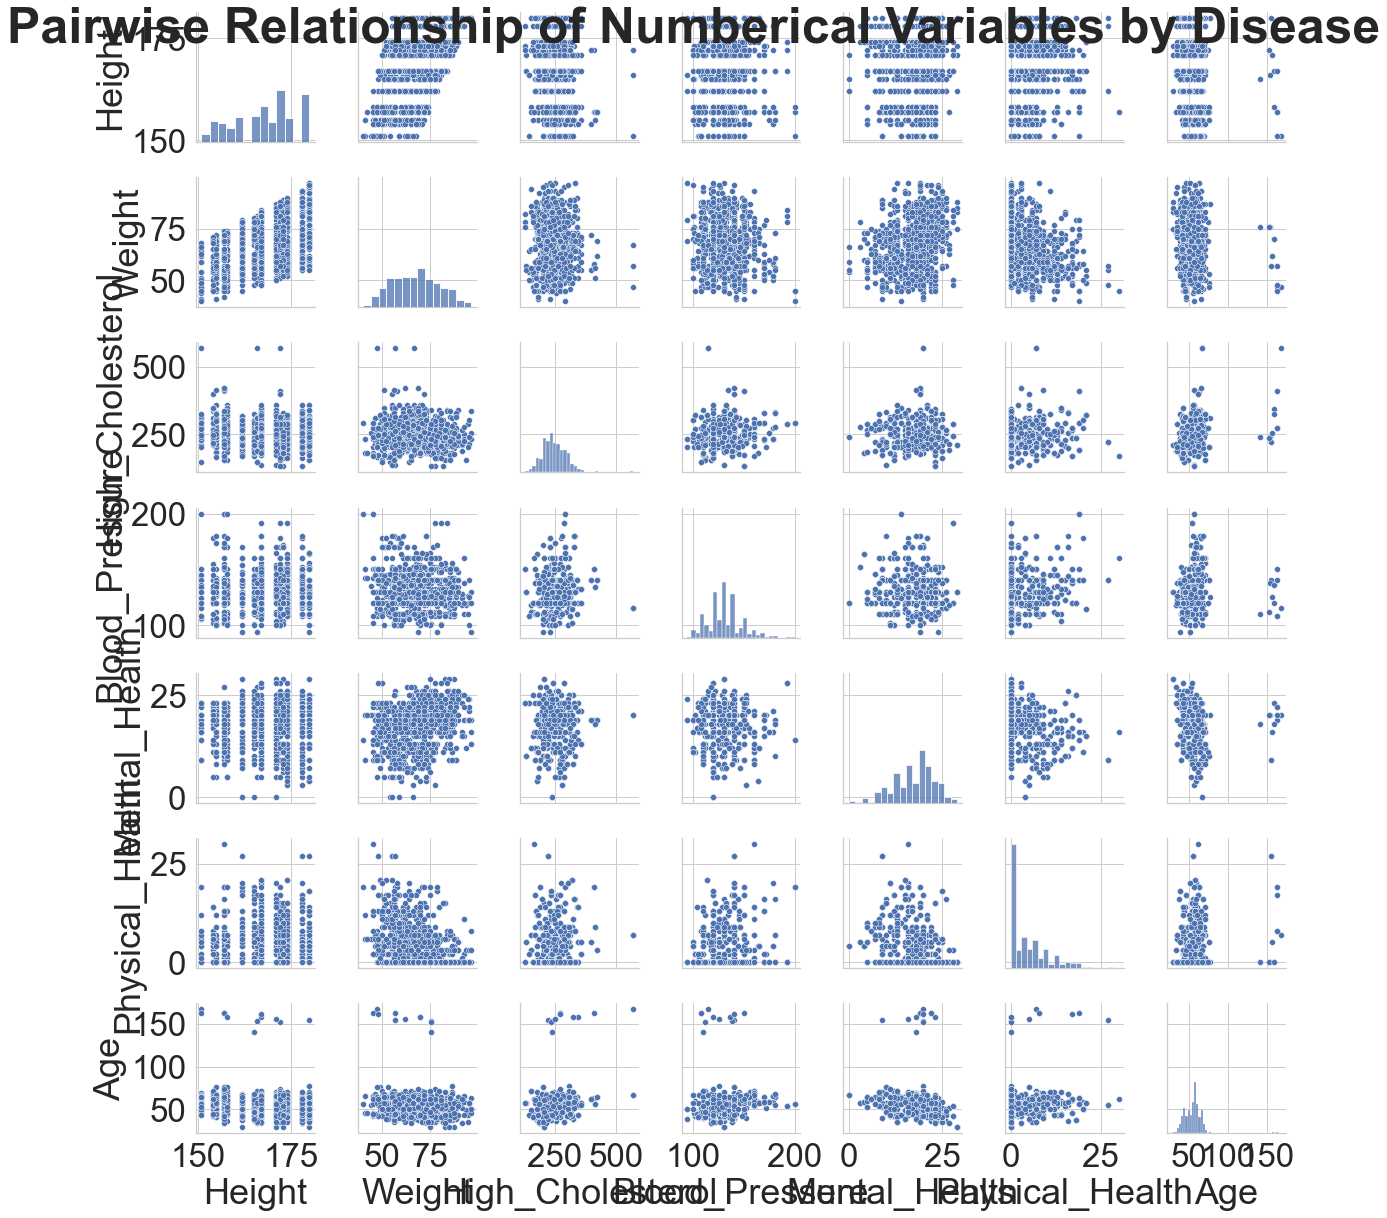

In [88]:
sns.set(font_scale=3)
sns.set_style("whitegrid")

sns.pairplot(train_patient_num)
plt.tight_layout(pad=5)
title = "Pairwise Relationship of Numerical Variables by Disease"

plt.suptitle(title, fontsize=50, fontweight="bold")

plt.show()

With the help of the box plots and the histograms we were able to find outliers in:
	
* High_Cholestrol
* Age

We will now test several methods to deal with these outliers and then apply the one we find the most suiting.

### 2.4.1 Inter Quartile Range

In [89]:
iq = train_patient_num.copy()
Q1 = iq.quantile(0.25)  
Q3 = iq.quantile(0.75)
IQR = Q3 - Q1
IQR

Height              11.00
Weight              19.00
High_Cholesterol    66.25
Blood_Pressure      20.00
Mental_Health        8.00
Physical_Health      7.00
Age                 13.00
dtype: float64

In [90]:
iq = iq[~((iq < (Q1 - 1.5 * IQR)) |(iq > (Q3 + 1.5 * IQR))).any(axis=1)]

In [91]:
iq

Height  Weight  High_Cholesterol  Blood_Pressure  Mental_Health  \
PatientID                                                                    
1167          155      67               358             120             21   
1805          173      88               230             142              9   
1557          162      68               226             122             26   
1658          180      66               313             125             13   
1544          180      58               277             125             18   
...           ...     ...               ...             ...            ...   
1912          173      74               202             120             13   
1909          178      61               204             144             12   
1386          157      61               213             120             23   
1662          165      75               208             112             16   
1117          173      70               181             120             11   

           Physical_Health  Age  
PatientID                        
1167                     2   57  
1805                     0   53  
1557                     0   48  
1658                     8   64  
1544                     2   54  
...                    ...  ...  
1912                     7   35  
1909                     4   50  
1386                     0   42  
1662                     0   47  
1117                    12   43  

[738 rows x 7 columns]

In [92]:
print("The percentage of data removed with this method is ", (1-(iq.shape[0] / train_patient_num.shape[0]))*100)

The percentage of data removed with this method is  7.750000000000002


### 2.4.2 Local Outlier Factor

In [93]:
lof_df = train_patient.copy()

In [94]:
# Consider 20 neighbors 
lof = LocalOutlierFactor(n_neighbors=20)

In [95]:
lof_pred=lof.fit_predict(lof_df[train_patient_num.columns])

In [96]:
outlier_index = lof_df[lof_pred == -1] # negative values are outliers
outlier_index

Name  Birth_Year                    Region  \
PatientID                                                                  
1591              Mrs. Ashley Pena        1859  Yorkshire and the Humber   
1464            Mrs. Jeanne Rogers        1955             East Midlands   
1175              Mrs. Opal Miller        1966             West Midlands   
1481               Mrs. Lisa Cooks        1859             East Midlands   
1288        Mrs. Minnie Hirschfeld        1864  Yorkshire and the Humber   
1685           Mrs. Bonnie Johnson        1959                    London   
1101              Mr. Steven Scott        1965                South West   
1255        Mrs. Jacqueline Revard        1960                    London   
1139                 Mr. Gary Baca        1881             East Midlands   
1986            Mrs. Sonia Johnson        1967                    London   
1158       Mrs. Mary Hollingsworth        1855                South West   
1891             Mrs. Lydia Palmer        1958           East of England   
1257           Mrs. Wendy Brammell        1958                North West   
1165            Mr. Ricky Kimmerle        1963                    London   
1996               Mrs. Karl Gurry        1966                North West   
1593             Mrs. Nicole Ronin        1859                North East   
1294            Mrs. Vicki Dickman        1966             West Midlands   
1475             Mr. David Roswell        1965                South West   
1055           Mr. Douglas Salters        1867             East Midlands   
1665           Mrs. Melanie Howard        1957                South West   
1069         Mrs. Constance Rivera        1960                    London   
1836             Mrs. Sharyn Furst        1869             West Midlands   
1803           Mr. Kenneth Ferraro        1870           East of England   
1072             Mr. Steven Fisher        1866             East Midlands   
1390            Mrs. Susan Bullard        1864             East Midlands   
1123             Mrs. Sheena Kelly        1957                    London   
1192          Mrs. Karen Smallidge        1955                    London   
1179              Mrs. Peggy Moore        1966                    London   
1542           Mrs. Sharon Heppler        1960  Yorkshire and the Humber   
1508           Mrs. Ann Montgomery        1966                    London   
1070              Mr. David Guzman        1963  Yorkshire and the Humber   
1088            Mrs. Cheryl Harris        1860             East Midlands   

                                             Education  Disease  Height  \
PatientID                                                                 
1591              Elementary School (1st to 9th grade)        0     157   
1464       High School Incomplete (10th to 11th grade)        1     166   
1175              University Incomplete (1 to 2 years)        0     157   
1481                              High School Graduate        0     157   
1288       High School Incomplete (10th to 11th grade)        1     167   
1685                              High School Graduate        0     172   
1101       High School Incomplete (10th to 11th grade)        1     178   
1255              Elementary School (1st to 9th grade)        1     154   
1139              University Incomplete (1 to 2 years)        1     165   
1986              Elementary School (1st to 9th grade)        0     157   
1158              Elementary School (1st to 9th grade)        1     151   
1891                   I never attended school / Other        1     167   
1257             University Complete (3 or more years)        1     155   
1165             University Complete (3 or more years)        0     171   
1996              Elementary School (1st to 9th grade)        0     157   
1593              Elementary School (1st to 9th grade)        0     151   
1294                              High School Graduate        0     158   
1475              El

In [97]:
print("The percentage of data removed with this method is ", round((outlier_index.shape[0] / train_patient.shape[0])*100,2))

The percentage of data removed with this method is  4.0


### 2.4.3 Z-Score

In [98]:
z_score = train_patient.copy()

In [99]:
z = np.abs(stats.zscore(z_score[train_patient_num.columns]))

In [100]:
z

Height    Weight  High_Cholesterol  Blood_Pressure  \
PatientID                                                         
1167       1.606424  0.068355          2.108834        0.648617   
1805       0.651507  1.666337          0.374944        0.642309   
1557       0.728339  0.014249          0.452562        0.531260   
1658       1.529591  0.150959          1.235631        0.355225   
1544       1.529591  0.811794          0.537069        0.355225   
...             ...       ...               ...             ...   
1909       1.278710  0.563981          0.879461        0.759666   
1386       1.355542  0.563981          0.704821        0.648617   
1088       0.101136  1.637838          0.440046        0.524952   
1662       0.352018  0.592480          0.801843        1.118044   
1117       0.651507  0.179458          1.325765        0.648617   

           Mental_Health  Physical_Health       Age  
PatientID                                            
1167            0.679144         0.469859  0.067722  
1805            1.550604         0.837116  0.191812  
1557            1.608206         0.837116  0.516230  
1658            0.807355         0.631911  0.521907  
1544            0.121707         0.469859  0.126928  
...                  ...              ...       ...  
1909            0.993167         0.102602  0.386463  
1386            1.050769         0.837116  0.905531  
1088            0.493332         2.284566  6.880494  
1662            0.249918         0.837116  0.581113  
1117            1.178980         1.366424  0.840647  

[800 rows x 7 columns]

In [101]:
np.where(z > 3)

(array([ 18,  22,  35,  61,  61,  89,  93, 103, 177, 194, 198, 312, 312,
        341, 460, 473, 481, 493, 503, 511, 542, 566, 566, 585, 586, 588,
        593, 617, 640, 648, 695, 705, 710, 720, 729, 754, 757, 761, 797],
       dtype=int64),
 array([6, 2, 3, 2, 6, 5, 6, 2, 4, 4, 6, 2, 6, 4, 5, 2, 4, 6, 3, 5, 5, 5,
        6, 3, 2, 5, 6, 3, 6, 6, 5, 6, 3, 2, 2, 5, 2, 3, 6], dtype=int64))

In [102]:
# Remove the observations 3 standard deviations above the mean
z_score = z_score[(z < 3).all(axis=1)]

In [103]:
print("The percentage of data removed with this method is ",(1 - (z_score.shape[0] / train_patient.shape[0]))*100)

The percentage of data removed with this method is  4.5000000000000036


In [104]:
z_score

Name  Birth_Year                    Region  \
PatientID                                                                 
1167           Mrs. Stephanie Gay        1965                    London   
1805             Mr. Sherman Nero        1969                South West   
1557              Mr. Mark Boller        1974  Yorkshire and the Humber   
1658             Mr. David Caffee        1958                    London   
1544             Mr. Gerald Emery        1968                South East   
...                           ...         ...                       ...   
1912           Mr. Mike Jefferson        1987  Yorkshire and the Humber   
1909             Mr. Philip Klink        1972             East Midlands   
1386         Mrs. Jackie Valencia        1980                North West   
1662        Mr. Florencio Doherty        1975           East of England   
1117       Mr. Freddie Vermillion        1979                    London   

                                             Education  Disease  Height  \
PatientID                                                                 
1167       High School Incomplete (10th to 11th grade)        1     155   
1805       High School Incomplete (10th to 11th grade)        1     173   
1557              Elementary School (1st to 9th grade)        1     162   
1658             University Complete (3 or more years)        0     180   
1544              University Incomplete (1 to 2 years)        1     180   
...                                                ...      ...     ...   
1912                              High School Graduate        0     173   
1909       High School Incomplete (10th to 11th grade)        0     178   
1386              Elementary School (1st to 9th grade)        1     157   
1662              Elementary School (1st to 9th grade)        1     165   
1117              Elementary School (1st to 9th grade)        0     173   

           Weight  High_Cholesterol  Blood_Pressure  Mental_Health  ...  \
PatientID                                                           ...   
1167           67               358             120             21  ...   
1805           88               230             142              9  ...   
1557           68               226             122             26  ...   
1658           66               313             125             13  ...   
1544           58               277             125             18  ...   
...           ...               ...             ...            ...  ...   
1912           74               202             120             13  ...   
1909           61               204             144             12  ...   
1386           61               213             120             23  ...   
1662           75               208             112             16  ...   
1117           70               181             120             11  ...   

           Exercise                                      Fruit_Habit  \
PatientID                                                              
1167            Yes  Less than 1. I do not consume fruits every day.   
1805            Yes  Less than 1. I do not consume fruits every day.   
1557             No  Less than 1. I do not consume fruits every day.   
1658            Yes  Less than 1. I do not consume fruits every day.   
1544             No                1 to 2 pieces of fruit in average   
...             ...                                              ...   
1912            Yes  Less than 1. I do not consume fruits every day.   
1909            Yes  Less than 1. I do not consume fruits every day.   
1386             No  Less than 1. I do not consume fruits every day.   
1662             No  Less than 1. I do not consume fruits every day.   
1117            Yes  Less than 1. I do not consume fruits every day.   

                                              Water_Habit  Cholesterol_Cat  \
PatientID                                                                    
1167    

In [ ]:
train_patient = z_score.copy()

### 2.5 Encoding and Split

Let's now look at our dataframe's columns at this point and see which ones are no longer necessary.

In [105]:
train_patient.columns

Index(['Name', 'Birth_Year', 'Region', 'Education', 'Disease', 'Height',
       'Weight', 'High_Cholesterol', 'Blood_Pressure', 'Mental_Health',
       'Physical_Health', 'Checkup', 'Diabetes', 'Smoking_Habit',
       'Drinking_Habit', 'Exercise', 'Fruit_Habit', 'Water_Habit',
       'Cholesterol_Cat', 'Mental_Health_Cat', 'Blood_Pressure_Cat', 'Gender',
       'Age', 'BMI', 'BMI_Cat'],
      dtype='object')

In [106]:
train_patient.drop(["Birth_Year","Name", "Cholesterol_Cat","Mental_Health_Cat", "Blood_Pressure_Cat", "BMI_Cat" ],axis = 1, inplace=True)

In [107]:
X = train_patient.drop('Disease', axis = 1)
y = train_patient['Disease']

In [108]:
train_patient = pd.get_dummies(X, drop_first=True)

In [109]:
train_patient

Height  Weight  High_Cholesterol  Blood_Pressure  Mental_Health  \
PatientID                                                                    
1167          155      67               358             120             21   
1805          173      88               230             142              9   
1557          162      68               226             122             26   
1658          180      66               313             125             13   
1544          180      58               277             125             18   
...           ...     ...               ...             ...            ...   
1909          178      61               204             144             12   
1386          157      61               213             120             23   
1088          167      48               272             140             20   
1662          165      75               208             112             16   
1117          173      70               181             120             11   

           Physical_Health  Age    BMI  Region_East of England  Region_London  \
PatientID                                                                       
1167                     2   57  27.89                       0              1   
1805                     0   53  29.40                       0              0   
1557                     0   48  25.91                       0              0   
1658                     8   64  20.37                       0              1   
1544                     2   54  17.90                       0              0   
...                    ...  ...    ...                     ...            ...   
1909                     4   50  19.25                       0              0   
1386                     0   42  24.75                       0              0   
1088                    17  162  17.21                       0              0   
1662                     0   47  27.55                       1              0   
1117                    12   43  23.39                       0              1   

           ...  Drinking_Habit_I do not consume any type of alcohol  \
PatientID  ...                                                        
1167       ...                                                  0     
1805       ...                                                  0     
1557       ...                                                  0     
1658       ...                                                  0     
1544       ...                                                  0     
...        ...                                                ...     
1909       ...                                                  0     
1386       ...                                                  0     
1088       ...                                                  0     
1662       ...                                                  0     
1117       ...                                                  0     

           Drinking_Habit_I usually consume alcohol every day  Exercise_Yes  \
PatientID                                                                     
1167                                                       1              1   
1805                                                       0              1   
1557                                                       0              0   
1658                                                       1              1   
1544                                                       0              0   
...                                                      ...            ...   
1909                                                       0              1   
1386                                                       1              0   
1088                                                       0              0   
1662                                                       1              0   
1117                                                       0          

In [110]:
train_patient.columns

Index(['Height', 'Weight', 'High_Cholesterol', 'Blood_Pressure',
       'Mental_Health', 'Physical_Health', 'Age', 'BMI',
       'Region_East of England', 'Region_London', 'Region_North East',
       'Region_North West', 'Region_South East', 'Region_South West',
       'Region_West Midlands', 'Region_Yorkshire and the Humber',
       'Education_High School Graduate',
       'Education_High School Incomplete (10th to 11th grade)',
       'Education_I never attended school / Other',
       'Education_University Complete (3 or more years)',
       'Education_University Incomplete (1 to 2 years)',
       'Checkup_Less than three months', 'Checkup_More than 3 years',
       'Checkup_Not sure',
       'Diabetes_I don't have diabetes, but I have direct family members who have diabetes.',
       'Diabetes_I have/had pregnancy diabetes or borderline diabetes',
       'Diabetes_Neither I nor my immediate family have diabetes.',
       'Smoking_Habit_Yes',
       'Drinking_Habit_I do not consume 

In [111]:
X_train, X_val, y_train, y_val = train_test_split(train_patient, y,
                                                 test_size = 0.2,
                                                 shuffle = True,
                                                 random_state = 15,
                                                 stratify = y)

In [112]:
print('Training Data')
print(y_train.value_counts()/len(y_train))
print('Validation Data')
print(y_val.value_counts()/len(y_val))

Training Data
1    0.514062
0    0.485938
Name: Disease, dtype: float64
Validation Data
1    0.5125
0    0.4875
Name: Disease, dtype: float64


### 2.6 Scaling

Since variables that are measured at different scales do not contribute equally to the model fitting and model learned function and might end up creating a bias, we will deal with this potential problem by applying a Robust Scaler.

In [116]:
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)

X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

In [117]:
scaler = MinMaxScaler().fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array
# Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
X_train_num_scaled.head(3)

Height    Weight  High_Cholesterol  Blood_Pressure  \
PatientID                                                         
1808       0.379310  0.508772          0.230594        0.000000   
1767       0.551724  0.298246          0.152968        0.471698   
1401       0.241379  0.175439          0.052511        0.169811   

           Mental_Health  Physical_Health       Age       BMI  \
PatientID                                                       
1808            0.655172         0.000000  0.159420  0.708524   
1767            0.551724         0.533333  0.282609  0.263318   
1401            0.413793         0.233333  0.304348  0.232116   

           Region_East of England  Region_London  ...  \
PatientID                                         ...   
1808                          0.0            0.0  ...   
1767                          1.0            0.0  ...   
1401                          0.0            1.0  ...   

           Drinking_Habit_I do not consume any type of alcohol  \
PatientID                                                        
1808                                                     0.0     
1767                                                     0.0     
1401                                                     0.0     

           Drinking_Habit_I usually consume alcohol every day  Exercise_Yes  \
PatientID                                                                     
1808                                                     1.0            1.0   
1767                                                     1.0            0.0   
1401                                                     1.0            0.0   

           Fruit_Habit_3 to 4 pieces of fruit in average  \
PatientID                                                  
1808                                                 0.0   
1767                                                 1.0   
1401                                                 0.0   

           Fruit_Habit_5 to 6 pieces of fruit in average  \
PatientID                                                  
1808                                                 0.0   
1767                                                 0.0   
1401                                                 0.0   

           Fruit_Habit_Less than 1. I do not consume fruits every day.  \
PatientID                                                                
1808                                                     0.0             
1767                                                     0.0             
1401                                                     1.0             

           Fruit_Habit_More than six pieces of fruit  \
PatientID                                              
1808                                             0.0   
1767                                             0.0   
1401                                             0.0   

           Water_Habit_Less than half a liter  \
PatientID                                       
1808                                      0.0   
1767                                      1.0   
1401                                      0.0   

           Water_Habit_More than half a liter but less than one liter  \
PatientID                                                               
1808                                                     0.0            
1767                                                     0.0            
1401                                                     1.0            

           Gender_M  
PatientID            
1808            1.0  
1767            1.0  
1401            0.0  

[3 rows x 38 columns]

In [118]:
X_val_num_scaled = scaler.transform(X_val_num) # this will return an array
# Convert the array to a pandas dataframe
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)
X_val_num_scaled.head(3)

Height    Weight  High_Cholesterol  Blood_Pressure  \
PatientID                                                         
1870       0.724138  0.771930          0.340183        0.339623   
1324       0.793103  0.596491          0.271689        0.339623   
1733       0.517241  0.245614          0.034247        0.132075   

           Mental_Health  Physical_Health       Age       BMI  \
PatientID                                                       
1870            0.517241         0.000000  0.137681  0.868341   
1324            0.827586         0.000000  0.137681  0.567732   
1733            0.793103         0.066667  0.108696  0.199391   

           Region_East of England  Region_London  ...  \
PatientID                                         ...   
1870                          0.0            0.0  ...   
1324                          0.0            0.0  ...   
1733                          0.0            0.0  ...   

           Drinking_Habit_I do not consume any type of alcohol  \
PatientID                                                        
1870                                                     0.0     
1324                                                     0.0     
1733                                                     0.0     

           Drinking_Habit_I usually consume alcohol every day  Exercise_Yes  \
PatientID                                                                     
1870                                                     1.0            0.0   
1324                                                     0.0            0.0   
1733                                                     1.0            0.0   

           Fruit_Habit_3 to 4 pieces of fruit in average  \
PatientID                                                  
1870                                                 0.0   
1324                                                 0.0   
1733                                                 0.0   

           Fruit_Habit_5 to 6 pieces of fruit in average  \
PatientID                                                  
1870                                                 0.0   
1324                                                 0.0   
1733                                                 0.0   

           Fruit_Habit_Less than 1. I do not consume fruits every day.  \
PatientID                                                                
1870                                                     1.0             
1324                                                     1.0             
1733                                                     1.0             

           Fruit_Habit_More than six pieces of fruit  \
PatientID                                              
1870                                             0.0   
1324                                             0.0   
1733                                             0.0   

           Water_Habit_Less than half a liter  \
PatientID                                       
1870                                      0.0   
1324                                      0.0   
1733                                      0.0   

           Water_Habit_More than half a liter but less than one liter  \
PatientID                                                               
1870                                                     1.0            
1324                                                     1.0            
1733                                                     0.0            

           Gender_M  
PatientID            
1870            0.0  
1324            1.0  
1733            0.0  

[3 rows x 38 columns]

### 2.7 Feature Selection

### 2.7.1 Spearman Correlation

In [119]:
all_train_num = X_train_num_scaled.join(y_train)
all_train_num.head()

Height    Weight  High_Cholesterol  Blood_Pressure  \
PatientID                                                         
1808       0.379310  0.508772          0.230594        0.000000   
1767       0.551724  0.298246          0.152968        0.471698   
1401       0.241379  0.175439          0.052511        0.169811   
1381       0.758621  0.754386          0.223744        0.358491   
1009       0.793103  0.526316          0.365297        0.264151   

           Mental_Health  Physical_Health       Age       BMI  \
PatientID                                                       
1808            0.655172         0.000000  0.159420  0.708524   
1767            0.551724         0.533333  0.282609  0.263318   
1401            0.413793         0.233333  0.304348  0.232116   
1381            0.793103         0.500000  0.210145  0.818113   
1009            0.344828         0.500000  0.181159  0.467275   

           Region_East of England  Region_London  ...  \
PatientID                                         ...   
1808                          0.0            0.0  ...   
1767                          1.0            0.0  ...   
1401                          0.0            1.0  ...   
1381                          0.0            0.0  ...   
1009                          0.0            0.0  ...   

           Drinking_Habit_I usually consume alcohol every day  Exercise_Yes  \
PatientID                                                                     
1808                                                     1.0            1.0   
1767                                                     1.0            0.0   
1401                                                     1.0            0.0   
1381                                                     0.0            0.0   
1009                                                     0.0            1.0   

           Fruit_Habit_3 to 4 pieces of fruit in average  \
PatientID                                                  
1808                                                 0.0   
1767                                                 1.0   
1401                                                 0.0   
1381                                                 1.0   
1009                                                 1.0   

           Fruit_Habit_5 to 6 pieces of fruit in average  \
PatientID                                                  
1808                                                 0.0   
1767                                                 0.0   
1401                                                 0.0   
1381                                                 0.0   
1009                                                 0.0   

           Fruit_Habit_Less than 1. I do not consume fruits every day.  \
PatientID                                                                
1808                                                     0.0             
1767                                                     0.0             
1401                                                     1.0             
1381                                                     0.0             
1009                                                     0.0             

           Fruit_Habit_More than six pieces of fruit  \
PatientID                                              
1808                                             0.0   
1767                                             0.0   
1401                                             0.0   
1381                                             0.0   
1009                                             0.0   

           Water_Habit_Less than half a liter  \
PatientID                                       
1808                                      0.0   
1767                                      1.0   
1401                                      0.0   
1381                                      0.0   
1009                                      0.0   

           Water_Habit_More than ha

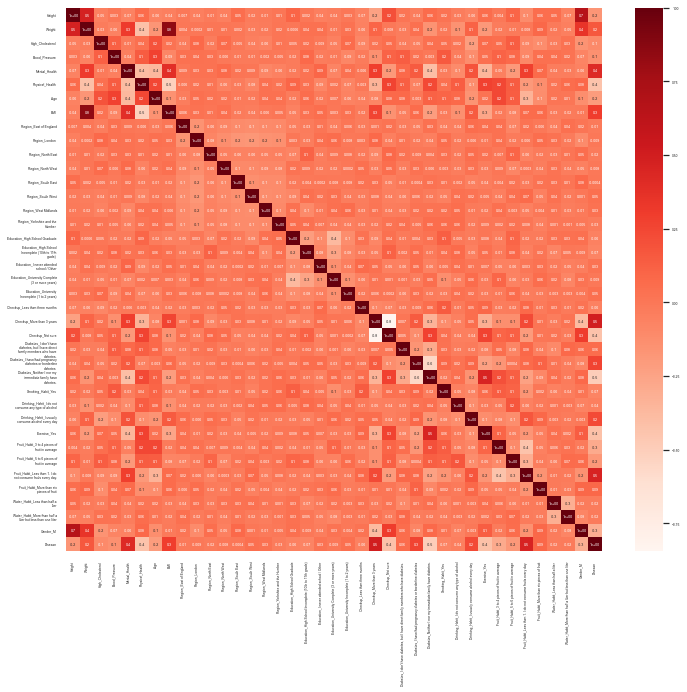

In [161]:
def cor_heatmap(cor):
    sns.set(font_scale=0.3)
    plt.figure(figsize=(12,10))
    labels = [];
    for label in cor.columns:
        labels.append(textwrap.fill(label, width=30,
                      break_long_words=False))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1', yticklabels=labels)
    plt.savefig('Figures/Spearman Correlation.png', dpi=100, bbox_inches='tight')
    plt.show()

cor_spearman = all_train_num.corr(method ='spearman')
cor_spearman

cor_heatmap(cor_spearman)

### 2.7.2 Univariate Variables

Checking if any of the numerical variables is univariate (variance is equal to 0).

In [121]:
X_train_num_scaled.var()

Height                                                                                 0.078040
Weight                                                                                 0.044024
High_Cholesterol                                                                       0.014759
Blood_Pressure                                                                         0.025630
Mental_Health                                                                          0.034515
Physical_Health                                                                        0.032614
Age                                                                                    0.012919
BMI                                                                                    0.076732
Region_East of England                                                                 0.086363
Region_London                                                                          0.151602
Region_North East                       

There are no univariate variables.

### 2.7.3 Logistic Regression

In [122]:
#logistic

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=38)
embeded_lr_selector.fit(train_patient, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = train_patient.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')
print(embeded_lr_feature)

10 selected features
['BMI', 'Checkup_More than 3 years', 'Checkup_Not sure', 'Diabetes_I have/had pregnancy diabetes or borderline diabetes', 'Diabetes_Neither I nor my immediate family have diabetes.', 'Drinking_Habit_I usually consume alcohol every day', 'Exercise_Yes', 'Fruit_Habit_3 to 4 pieces of fruit in average', 'Fruit_Habit_Less than 1. I do not consume fruits every day.', 'Gender_M']


### 2.7.4 Random Forest

In [123]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=38)
embeded_rf_selector.fit(train_patient,y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = train_patient.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

14 selected features
['Height', 'Weight', 'High_Cholesterol', 'Blood_Pressure', 'Mental_Health', 'Physical_Health', 'Age', 'BMI', 'Checkup_More than 3 years', 'Checkup_Not sure', 'Diabetes_Neither I nor my immediate family have diabetes.', 'Exercise_Yes', 'Fruit_Habit_Less than 1. I do not consume fruits every day.', 'Gender_M']


### 2.7.5 Chi-Square

In [124]:
#não está a funcionar pq quando fazemos os dummies deixamos de ter variáveis categóricas
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [125]:
for var in X_train_cat:
    TestIndependence(X_train_cat[var],y_train, var)

### 2.7.6 RFE

In [126]:
model = LogisticRegression()

In [127]:
nof_list=np.arange(1,49)   
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model, n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_val_rfe = rfe.transform(X_val)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 34
Score with 34 features: 0.893750


In [128]:
rfe = RFE(estimator = model, n_features_to_select = 6)

In [129]:
X_rfe = rfe.fit_transform(train_patient, y)

In [130]:
selected_features = pd.Series(rfe.support_, index = train_patient.columns)
selected_features

Height                                                                                 False
Weight                                                                                 False
High_Cholesterol                                                                       False
Blood_Pressure                                                                         False
Mental_Health                                                                          False
Physical_Health                                                                        False
Age                                                                                    False
BMI                                                                                    False
Region_East of England                                                                 False
Region_London                                                                          False
Region_North East                                                     

### 2.7.7 Dispertion Ratio

In [131]:
def dispersion(data):
    data = data +1 #avoid 0 division
    aritmeticMean = np.mean(data, axis =0 )
    geometricMean = np.power(np.prod(data, axis =0 ),1/data.shape[0])
    R = aritmeticMean/geometricMean
    return R

In [132]:
R = dispersion(train_patient)
pd.set_option('display.max_rows', None)
R.sort_values(ascending = False)

Height                                                                                      inf
Smoking_Habit_Yes                                                                           inf
Education_University Incomplete (1 to 2 years)                                              inf
Checkup_More than 3 years                                                                   inf
Checkup_Not sure                                                                            inf
Diabetes_I don't have diabetes, but I have direct family members who have diabetes.         inf
Diabetes_I have/had pregnancy diabetes or borderline diabetes                               inf
Diabetes_Neither I nor my immediate family have diabetes.                                   inf
Drinking_Habit_I usually consume alcohol every day                                          inf
Education_High School Incomplete (10th to 11th grade)                                       inf
Exercise_Yes                            

In [133]:
plt.figure(figsize=(60,20), dpi=200)
R.sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

In [134]:
dr_bool = []
for elem in R:
    if elem >= 1:
        dr_bool.append(True)
    else:
        dr_bool.append(False)

In [135]:
dr_features = pd.Series(dr_bool, index = train_patient.columns)

In [136]:
dr_features

Height                                                                                  True
Weight                                                                                  True
High_Cholesterol                                                                        True
Blood_Pressure                                                                          True
Mental_Health                                                                           True
Physical_Health                                                                         True
Age                                                                                     True
BMI                                                                                    False
Region_East of England                                                                  True
Region_London                                                                           True
Region_North East                                                     

### 2.7.8 Mean Absolute Diference (MAD)

In [137]:
mad = np.sum(np.abs(train_patient -np.mean(train_patient, axis =0 )), axis = 0)/train_patient.shape[0]
mad.sort_values(ascending = False)

High_Cholesterol                                                                       39.331525
Blood_Pressure                                                                         13.067081
Weight                                                                                 10.073881
Age                                                                                     8.743109
Height                                                                                  6.733828
Mental_Health                                                                           4.385413
Physical_Health                                                                         4.341309
BMI                                                                                     3.193920
Drinking_Habit_I usually consume alcohol every day                                      0.499887
Diabetes_Neither I nor my immediate family have diabetes.                               0.499800
Checkup_More than 3 years     

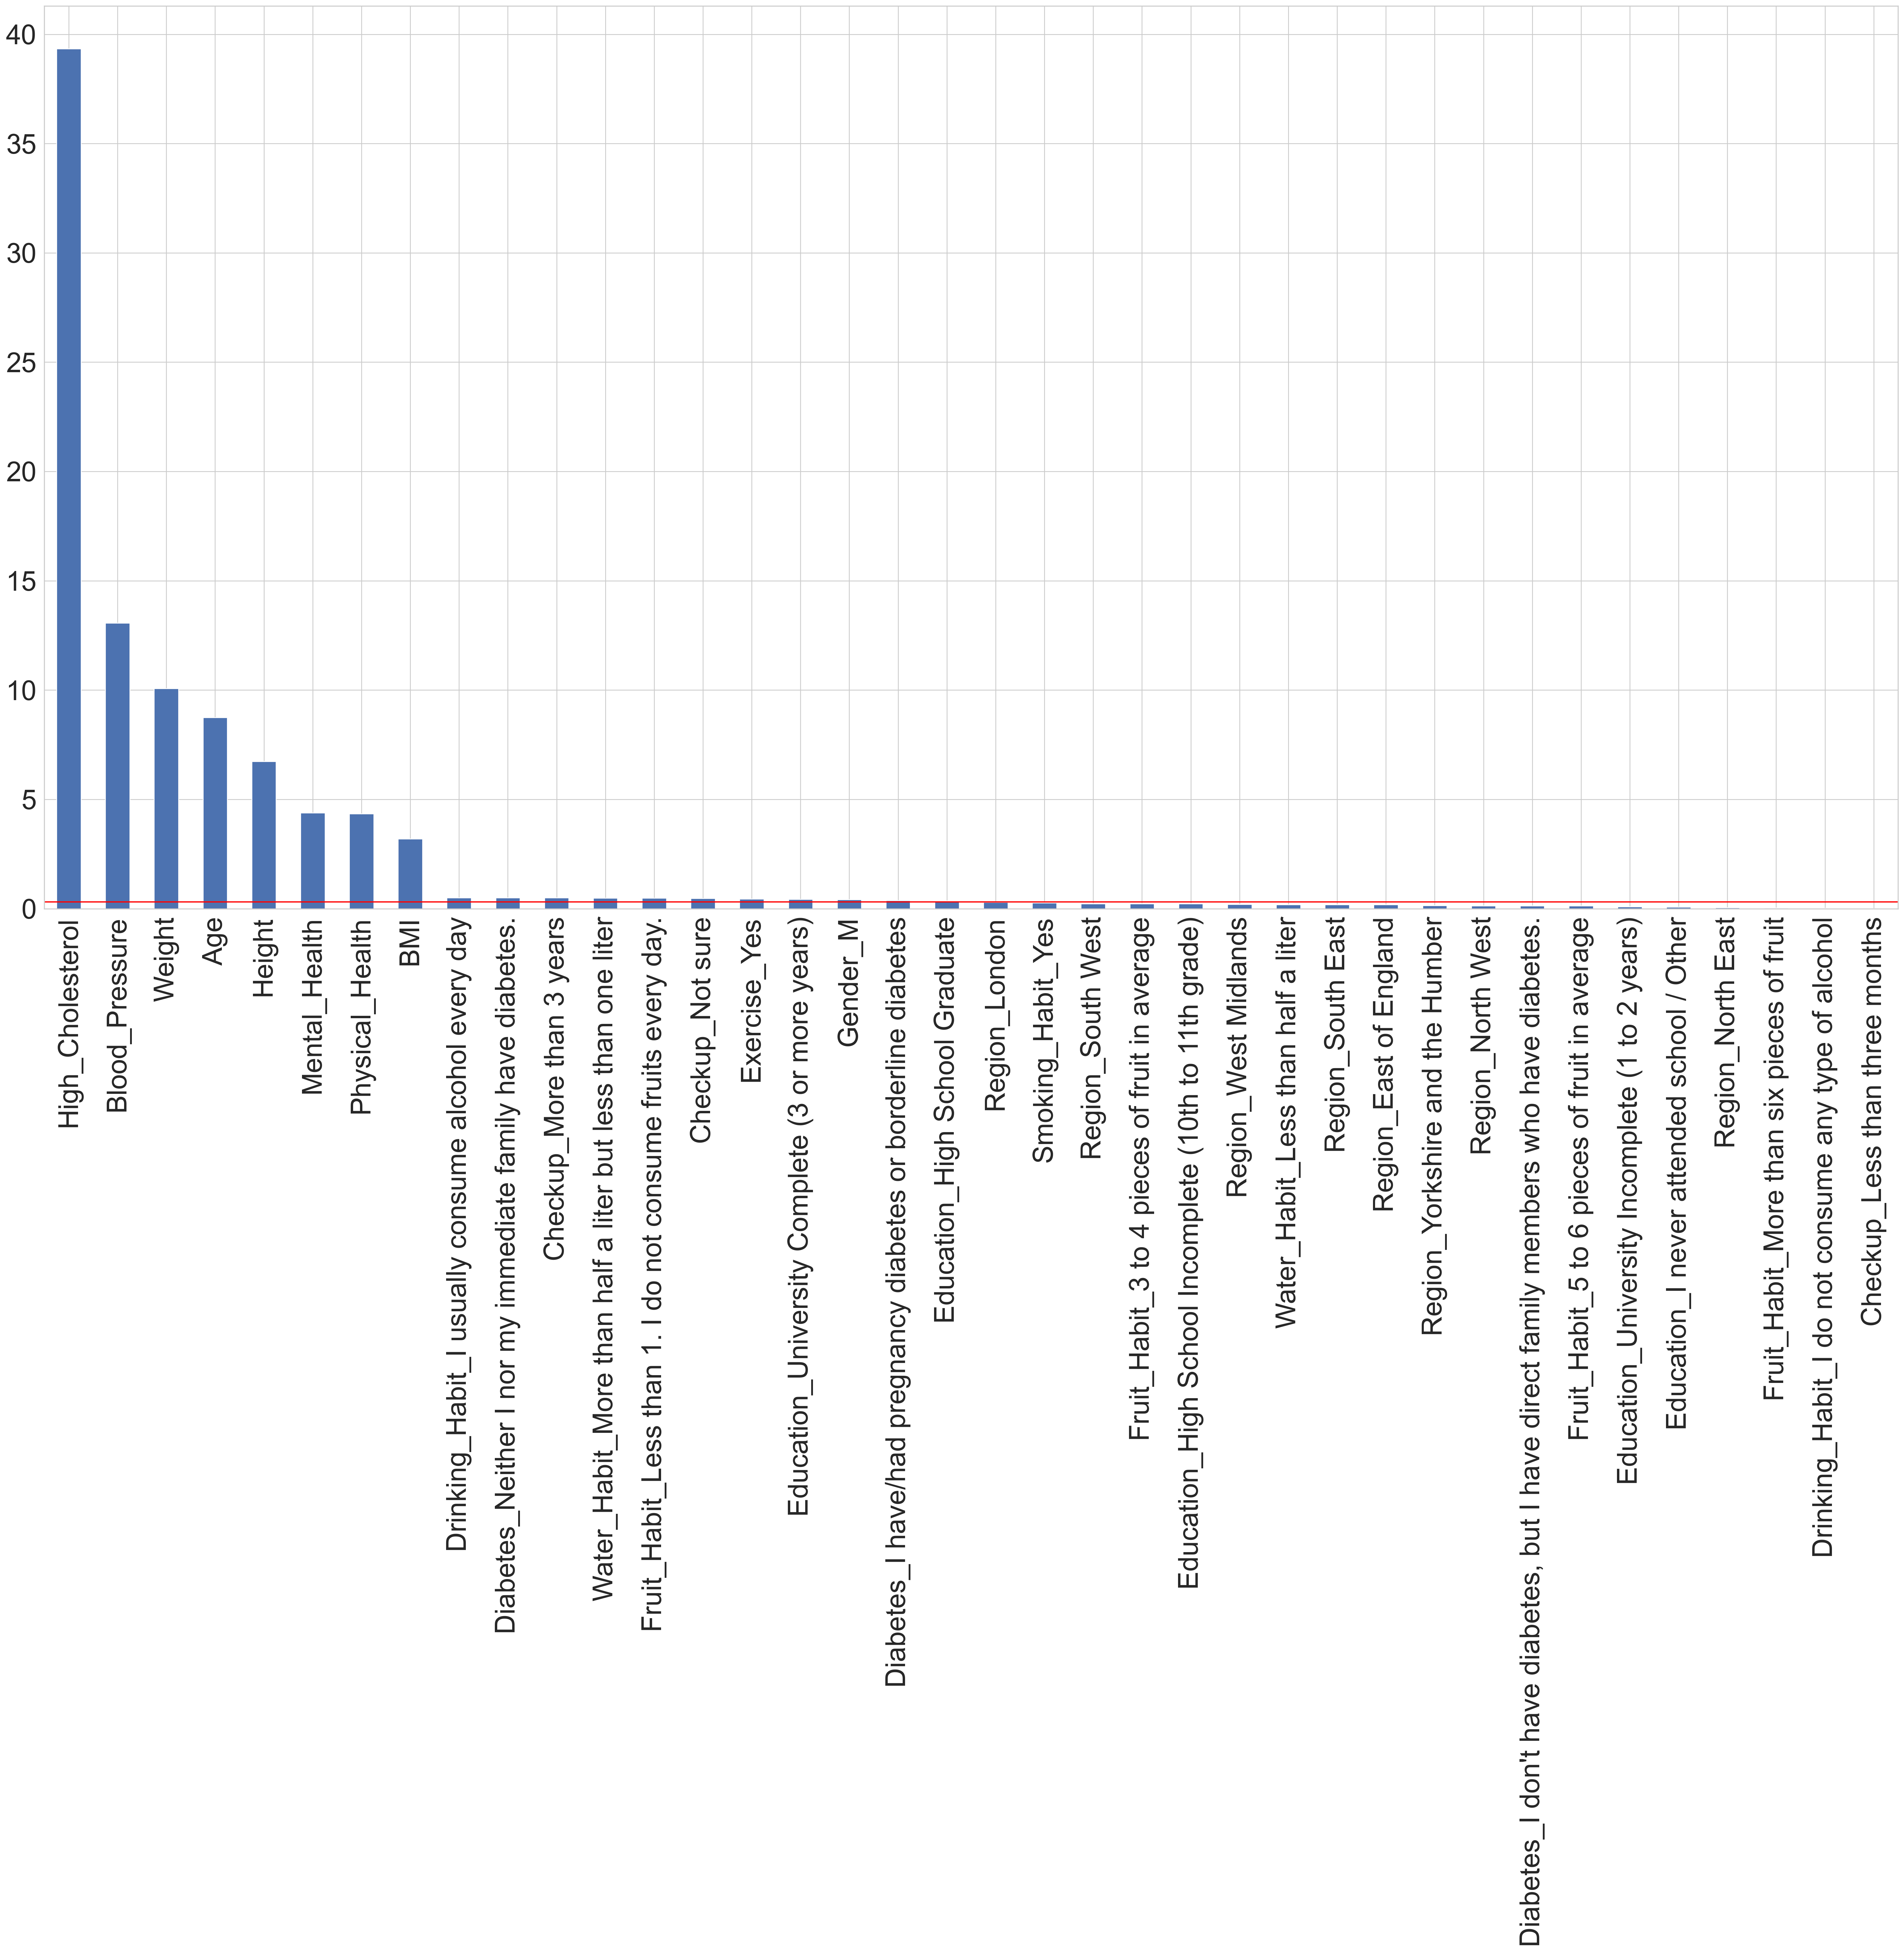

In [138]:
plt.figure(figsize=(40,20), dpi=200)
mad.sort_values(ascending=False).plot(kind='bar')
plt.axhline(y=0.307, color='red')

In [139]:
mad = mad.tolist()

In [140]:
mad_bool = []
for elem in mad:
    if elem > 0.307:
        mad_bool.append(True)
    else:
        mad_bool.append(False)

In [141]:
mad_features = pd.Series(mad_bool, index = train_patient.columns)

In [142]:
mad_features

Height                                                                                  True
Weight                                                                                  True
High_Cholesterol                                                                        True
Blood_Pressure                                                                          True
Mental_Health                                                                           True
Physical_Health                                                                         True
Age                                                                                     True
BMI                                                                                     True
Region_East of England                                                                 False
Region_London                                                                          False
Region_North East                                                     

### 2.7.9 Feature Selection Results

In [143]:
feature_selection_df = pd.DataFrame({'Feature':train_patient.columns,'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support,
                                     'RFE':selected_features, 
                                     #'Chi-Square': chi_features, 
                                     'MAD': mad_features,'DR' : dr_features})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(len(train_patient))

Feature  Logistics  \
1                                            Gender_M       True   
2   Fruit_Habit_Less than 1. I do not consume frui...       True   
3                                        Exercise_Yes       True   
4   Diabetes_Neither I nor my immediate family hav...       True   
5                           Checkup_More than 3 years       True   
6                                    Checkup_Not sure       True   
7                                              Weight      False   
8                                     Physical_Health      False   
9                                       Mental_Health      False   
10                                   High_Cholesterol      False   
11                                             Height      False   
12  Drinking_Habit_I usually consume alcohol every...       True   
13  Diabetes_I have/had pregnancy diabetes or bord...       True   
14                                     Blood_Pressure      False   
15                                                BMI       True   
16                                                Age      False   
17  Water_Habit_More than half a liter but less th...      False   
18          Fruit_Habit_More than six pieces of fruit      False   
19      Fruit_Habit_3 to 4 pieces of fruit in average       True   
20    Education_University Complete (3 or more years)      False   
21                     Education_High School Graduate      False   
22                 Water_Habit_Less than half a liter      False   
23                                  Smoking_Habit_Yes      False   
24                    Region_Yorkshire and the Humber      False   
25                               Region_West Midlands      False   
26                                  Region_South West      False   
27                                  Region_South East      False   
28                                  Region_North West      False   
29                                  Region_North East      False   
30                                      Region_London      False   
31                             Region_East of England      False   
32      Fruit_Habit_5 to 6 pieces of fruit in average      False   
33     Education_University Incomplete (1 to 2 years)      False   
34          Education_I never attended school / Other      False   
35  Education_High School Incomplete (10th to 11th...      False   
36  Drinking_Habit_I do not consume any type of al...      False   
37  Diabetes_I don't have diabetes, but I have dir...      False   
38                     Checkup_Less than three months      False   

    Random Forest    RFE    MAD     DR  Total  
1            True   True   True   True      5  
2            True   True   True   True      5  
3            True   True   True   True      5  
4            True   True   True   True      5  
5            True   True   True   True      5  
6            True  False   True   True      4  
7            True  False   True   True      3  
8            True  False   True   True      3  
9            True  False   True   True      3  
10           True  False   True   True      3  
11           True  False   True   True      3  
12          False  False   True   True      3  
13          False  False   True   True      3  
14           True  False   True   True      3  
15           True  False   True  False      3  
16           True  False   True   True      3  
17          False  False   True   True      2  
18          False   True  False   True      2  
19          False  False  False   True      2  
20          False  False   True   True      2  
21          False  False   True   True      2  
22          False  False  False   True      1  
23          False  False  False   True      1  
24          False  False  False   True      1  
25          False  False  False   True      1  
26          False  False  False   True      1  
27          False  False  False   True      1  
28          False  False  False   True      1  
2

In [144]:
fs_df3 = feature_selection_df[feature_selection_df["Total"]>4]
features_model = list(fs_df3["Feature"])
features_model

['Gender_M',
 'Fruit_Habit_Less than 1. I do not consume fruits every day.',
 'Exercise_Yes',
 'Diabetes_Neither I nor my immediate family have diabetes.',
 'Checkup_More than 3 years']

In [ ]:
X_train = X_train_num_scaled [['Gender_M',
 'Fruit_Habit_Less than 1. I do not consume fruits every day.',
 'Exercise_Yes',
 'Diabetes_Neither I nor my immediate family have diabetes.',
 'Checkup_More than 3 years',
 'Weight',
 'Physical_Health',
 'Mental_Health',
 'High_Cholesterol',
 'Drinking_Habit_I usually consume alcohol every day']]

In [ ]:
X_train

In [ ]:
X_val = X_val_num_scaled [['Gender_M',
 'Fruit_Habit_Less than 1. I do not consume fruits every day.',
 'Exercise_Yes',
 'Diabetes_Neither I nor my immediate family have diabetes.',
 'Checkup_More than 3 years',
 'Weight',
 'Physical_Health',
 'Mental_Health',
 'High_Cholesterol',
 'Drinking_Habit_I usually consume alcohol every day']]

In [ ]:
X_val

## 3. Modelling

###  3.1 Logistic Regression

In [147]:
grid_logreg={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid_logreg,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.8421875


In [148]:
log_model = LogisticRegression(C= 0.1, penalty= 'l2')

In [149]:
log_model.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [150]:
y_pred = log_model.predict(X_val)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1], dtype=int64)

In [151]:
pred_prob = log_model.predict_proba(X_val)
pred_prob

array([[0.05167241, 0.94832759],
       [0.06491421, 0.93508579],
       [0.0146024 , 0.9853976 ],
       [0.95745476, 0.04254524],
       [0.10001917, 0.89998083],
       [0.06930315, 0.93069685],
       [0.03375877, 0.96624123],
       [0.78114927, 0.21885073],
       [0.01790347, 0.98209653],
       [0.69529463, 0.30470537],
       [0.05139911, 0.94860089],
       [0.03295723, 0.96704277],
       [0.99517702, 0.00482298],
       [0.72269166, 0.27730834],
       [0.04673634, 0.95326366],
       [0.06401457, 0.93598543],
       [0.96269128, 0.03730872],
       [0.36064492, 0.63935508],
       [0.96009606, 0.03990394],
       [0.15228223, 0.84771777],
       [0.82375664, 0.17624336],
       [0.71260622, 0.28739378],
       [0.98705446, 0.01294554],
       [0.28339199, 0.71660801],
       [0.98176374, 0.01823626],
       [0.97581523, 0.02418477],
       [0.05500957, 0.94499043],
       [0.99670488, 0.00329512],
       [0.19726625, 0.80273375],
       [0.25210426, 0.74789574],
       [0.

In [152]:
log_model.coef_

array([[ 0.01121002, -0.01702181, -0.00193719, -0.01604494,  0.11507294,
        -0.15332921, -0.00390074,  0.03697798, -0.03503222, -0.06360579,
        -0.02132764, -0.08437183, -0.00973361,  0.01848614,  0.12454767,
        -0.00196483, -0.04793472, -0.11405465, -0.04301165,  0.00877563,
         0.01794393, -0.05089976,  0.7167552 , -0.63948466,  0.16463871,
         0.47553863, -0.88313148, -0.04714881,  0.02652227,  0.30658838,
        -0.58851294, -0.35416337, -0.07075146,  0.88104516,  0.0370975 ,
        -0.03592668, -0.01438538, -0.52938146]])

In [153]:
labels_train = log_model.predict(X_train)
labels_val = log_model.predict(X_val)

In [154]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [155]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       311
           1       0.83      0.88      0.86       329

    accuracy                           0.85       640
   macro avg       0.85      0.85      0.85       640
weighted avg       0.85      0.85      0.85       640

[[252  59]
 [ 39 290]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

In [ ]:
log_reg_cf = confusion_matrix(y_val, y_pred)

sns.heatmap(log_reg_cf, annot=True, cmap=plt.cm.copper)
plt.title("Logistic Regression \n Confusion Matrix", fontsize=14)

###  3.2 Bayes

In [ ]:
grid_modelNB={"var_smoothing":[0.0001,0.001,0.01,0.1]}
modelNB=GaussianNB()
modelNB_cv=GridSearchCV(modelNB,grid_modelNB,cv=10)
modelNB_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",modelNB_cv.best_params_)
print("accuracy :",modelNB_cv.best_score_)

In [ ]:
modelNB = GaussianNB(var_smoothing= 0.1)

In [ ]:
modelNB.fit(X = X_train, y = y_train)

In [ ]:
labels_train = modelNB.predict(X_train)
labels_val = modelNB.predict(X_val)

In [ ]:
modelNB.predict_proba(X_val)

In [ ]:
modelNB.score(X_train, y_train)

In [ ]:
modelNB.class_prior_

In [ ]:
modelNB.class_count_

In [ ]:
modelNB.theta_

In [ ]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

In [ ]:
naive_bayescf = confusion_matrix(y_val, y_pred)

sns.heatmap(naive_bayescf, annot=True, cmap=plt.cm.copper)
plt.title("Logistic Regression \n Naive Bayes", fontsize=14)

###  3.3 KNN

In [ ]:
modelKNN = KNeighborsClassifier()

In [ ]:
modelKNN.fit(X = X_train, y = y_train)

In [ ]:
labels_train = modelKNN.predict(X_train)
labels_val = modelKNN.predict(X_val)
labels_val

In [ ]:
modelKNN.predict_proba(X_val)

In [ ]:
print(modelKNN.score(X_train, y_train))
print(modelKNN.score(X_val, y_val))

In [ ]:
modelKNN.kneighbors(X = X_val)

In [ ]:
modelKNN4 = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)

In [ ]:
labels_train = modelKNN4.predict(X_train)
labels_val = modelKNN4.predict(X_val)

In [ ]:
modelKNN4.predict_proba(X_val)

In [ ]:
print(modelKNN4.score(X_train, y_train))
print(modelKNN4.score(X_val, y_val))

In [ ]:
import numpy as np
numberK_list=np.arange(2,90)
high_score=0
nof=0           
score_list_train =[]
score_list_val =[]
for n in numberK_list:
    model = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    score_train = model.score(X_train, y_train)
    score_val = model.score(X_val, y_val)
    score_list_train.append(score_train)
    score_list_val.append(score_val)
    
    if(score_val>high_score):
        high_score = score_val
        nof = numberK_list[n-1]
print("Best number of neighbors: %d" %nof)
print("Mean accuracy in train with %d neighbors: %f" % (nof, score_list_train[nof-1]))
print("Mean accuracy in validation with %d neighbors: %f" % (nof, high_score))

In [ ]:
modelKNNT = KNeighborsClassifier(algorithm='kd_tree').fit(X_train, y_train)

In [ ]:
labels_train = modelKNNT.predict(X_train)
labels_val = modelKNNT.predict(X_val)

In [ ]:
modelKNNT.score(X_train, y_train)
modelKNNT.score(X_val, y_val)

In [ ]:
modelKNNM = KNeighborsClassifier(metric = 'manhattan').fit(X = X_train, y = y_train)

In [ ]:
labels_train = modelKNNM.predict(X_train)
labels_val = modelKNNM.predict(X_val)

In [ ]:
print(modelKNNM.score(X_train, y_train))
print(modelKNNM.score(X_val, y_val))

In [ ]:
modelKNNW= KNeighborsClassifier(weights='distance').fit(X = X_train, y = y_train)

In [ ]:
labels_train = modelKNNW.predict(X_train)
labels_val = modelKNNW.predict(X_val)

In [ ]:
modelKNNW.predict_proba(X_val)

In [ ]:
print(modelKNNW.score(X_train, y_train))
print(modelKNNW.score(X_val, y_val))

In [ ]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

In [ ]:
knn_cf = confusion_matrix(y_val, y_pred)

sns.heatmap(knn_cf, annot=True, cmap=plt.cm.copper)
plt.title("Logistic Regression \n KNN", fontsize=14)

### 3.4 Decision Trees

In [ ]:
modelDT = DecisionTreeClassifier()

In [ ]:
modelDT.fit(X_train, y_train)

In [ ]:
dot_data = tree.export_graphviz(modelDT, out_file=None, 
                     feature_names=X_train.columns,  
                     class_names=["Lower Average", "Above Average"],  # only to classification problems
                     filled=True)  
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"25,25!"')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

In [ ]:
y_pred = modelDT.predict(X_val)

In [ ]:
print('The defined three has a depth of ' + str(modelDT.get_depth()) + ', ' + str(modelDT.tree_.node_count) + 
      ' nodes and a total of ' + str(modelDT.get_n_leaves()) + ' leaves.')

In [ ]:
modelDT.predict_proba(X_val)

In [ ]:
modelDT.score(X_train, y_train)

In [ ]:
modelDT.score(X_val, y_val)

In [ ]:
modelDT.feature_importances_

In [ ]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,10))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()
plot_feature_importances(modelDT)

In [ ]:
modelDT_entropy = DecisionTreeClassifier(criterion='entropy')
modelDT_entropy.fit(X_train, y_train)

In [ ]:
modelDT_entropy.score(X_val, y_val)

In [ ]:
modelDT_maxdepth8maxleafnodes48 = DecisionTreeClassifier(max_depth=8,max_leaf_nodes=48)

In [ ]:
modelDT_maxdepth8maxleafnodes48.fit(X_train, y_train)

In [ ]:
modelDT_maxdepth8maxleafnodes48.score(X_val, y_val)

In [ ]:
labels_val_modelDT_maxdepth8maxleafnodes48 = modelDT_maxdepth8maxleafnodes48.predict(X_val)
f1_score(y_val, labels_val_modelDT_maxdepth8maxleafnodes48)

In [ ]:
labels_train_modelDT_maxdepth8maxleafnodes48 = modelDT_maxdepth8maxleafnodes48.predict(X_train)
f1_score(y_train, labels_train_modelDT_maxdepth8maxleafnodes48)

In [ ]:
modelDT_maxdepth8maxleafnodes48.predict_proba(X_val)

In [ ]:
dot_data = tree.export_graphviz(modelDT_maxdepth8maxleafnodes48, out_file=None, 
                     feature_names=X_train.columns, 
                     class_names=["Lower Average", "Above Average"],  # only to classification problems
                     filled=True)  
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"10,10!"')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

In [ ]:
y_pred = modelDT_maxdepth8maxleafnodes48.predict(X_val)
print('The defined three has a depth of ' + str(modelDT.get_depth()) + ', ' + str(modelDT.tree_.node_count) + 
      ' nodes and a total of ' + str(modelDT.get_n_leaves()) + ' leaves.')

In [ ]:
modelDT.score(X_train, y_train)

In [ ]:
modelDT.score(X_val, y_val)

### 3.5 Support Vector Machine

#### 3.5.1 Support Vector Classification 

In [ ]:
param_grid_modelSVC = [
    {'C': [0.5,1,10,100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf','sigmoid'],
    'random_state':[None,1,10,20,30,40]
    },
    
]
optimal_params_modelSVC= GridSearchCV(SVC(), param_grid_modelSVC,cv=10,scoring ='f1',verbose=0)
optimal_params_modelSVC.fit(X_train, y_train)
print(optimal_params_modelSVC.best_params_)


In [ ]:
modelSVC = SVC().fit(X_train, y_train)

labels_train_modelSVC = modelSVC.predict(X_train)
labels_val_modelSVC = modelSVC.predict(X_val)
y_pred_modelSVC = modelSVC.predict(X_val)
metrics(y_train = y_train, pred_train = labels_train_modelSVC, y_val = y_val, pred_val = labels_val_modelSVC)

In [ ]:
svm_cm = confusion_matrix(y_val, y_pred_modelSVC)

sns.heatmap(svm_cm, annot=True, cmap=plt.cm.copper)
plt.title("Confusion Matrix \n SVM", fontsize=14)

#### 3.5.2 Nu-Support Vector Classification

In [ ]:
from sklearn.svm import NuSVC

In [ ]:
param_grid_modelNuSVC = [
    {'nu': [0.5,1,10,100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf','sigmoid'],
    'random_state':[None,1,10,20,30,40]
    },
    
]
optimal_params_modelNuSVC= GridSearchCV(NuSVC(), param_grid_modelNuSVC,cv=10,scoring ='f1',verbose=0)
optimal_params_modelNuSVC.fit(X_train, y_train)
print(optimal_params_modelNuSVC.best_params_)


In [ ]:
modelNuSVC = NuSVC(gamma=0.1,kernel= 'sigmoid').fit(X_train, y_train)
labels_train_modelNuSVC = modelNuSVC.predict(X_train)
labels_val_modelNuSVC = modelNuSVC.predict(X_val)
y_pred_modelNuSVC = modelNuSVC.predict(X_val)
metrics(y_train = y_train, pred_train = labels_train_modelNuSVC, y_val = y_val, pred_val = labels_val_modelNuSVC)

In [ ]:
svm_cm = confusion_matrix(y_val, y_pred_modelNuSVC)

sns.heatmap(svm_cm, annot=True, cmap=plt.cm.copper)
plt.title("Confusion Matrix \n SVM", fontsize=14)

#### 3.5.3 Linear Support Vector Classification

In [ ]:
param_grid_modelLinearSVC = [
    {'C': [0.5,1,10,100],
     'dual': [True,False],
    'random_state':[None,1,10,20,30,40]
    },
    
]
optimal_params_modelLinearSVC= GridSearchCV(LinearSVC(), param_grid_modelLinearSVC,cv=10,scoring ='f1',verbose=0)
optimal_params_modelLinearSVC.fit(X_train, y_train)
print(optimal_params_modelLinearSVC.best_params_)

In [ ]:
modelLinearSVC = LinearSVC().fit(X_train, y_train)
labels_train_modelLinearSVC = modelLinearSVC.predict(X_train)
labels_val_modelLinearSVC = modelLinearSVC.predict(X_val)
y_pred_modelLinearSVC = modelLinearSVC.predict(X_val)
metrics(y_train = y_train, pred_train = labels_train_modelLinearSVC, y_val = y_val, pred_val = labels_val_modelLinearSVC)

In [ ]:
svm_cm = confusion_matrix(y_val, y_pred_modelLinearSVC)

sns.heatmap(svm_cm, annot=True, cmap=plt.cm.copper)
plt.title("Confusion Matrix \n SVM", fontsize=14)

### 3.6 Neural Networks

In [ ]:
modelNN = MLPClassifier().fit(X_train, y_train)

In [ ]:
pred_val = modelNN.predict(X_val)
print('F1 Score:' ,f1_score(y_val, pred_val))
print('Mean Accuracy:' ,modelNN.score(X_val, y_val))

In [ ]:
def avg_score(model):
    score_train = []
    score_val = []
    timer = []
    f1_score_val = []
    f1_score_train = []
    
    for i in range(10):
        begin = time.perf_counter() # start counting time
        model.fit(X_train, y_train) # fit your model to your training data
        end = time.perf_counter() # stop counting time
        
        value_train = model.score(X_train, y_train) # mean accuracy for train
        value_val = model.score(X_val, y_val) # mean accuracy for validation
        score_train.append(value_train) # append the mean accuracy in train to your list score_train
        score_val.append(value_val) # append the mean accuracy in validation to your list score_val
        timer.append(end-begin) # append the time to your list timer
        f1_score_val.append(f1_score(model.predict(X_val), y_val))
        f1_score_train.append(f1_score(model.predict(X_train), y_train))
        
    
    avg_time = round(np.mean(timer),3) # check the mean value of training time for your 10 models 
    avg_train = round(np.mean(score_train),3) # check the mean accuracy in train for your 10 models
    avg_val = round(np.mean(score_val),3) # check the mean accuracy in validation for your 10 models
    std_time = round(np.std(timer),2) # check the standard deviation of training time for your 10 models
    std_train = round(np.std(score_train),2) # check the standard deviation of the mean accuracy in train for your 10 models
    std_val = round(np.std(score_val),2) # check the standard deviation of the mean accuracy in validation for your 10 models
    avg_f1_val = round(np.mean(f1_score_val),3)
    avg_f1_train = round(np.mean(f1_score_train),3)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_val) + '+/-' + str(std_val), str(avg_f1_train), str(avg_f1_val)

def show_results(df, models):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for model in models:
        # obtain the results provided by avg_score
        time, avg_train, avg_val, avg_f1_train, avg_f1_val = avg_score(model)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_val, avg_f1_train, avg_f1_val
        count+=1
    return df

In [ ]:
df = pd.DataFrame(columns = ['Time','Train','Validation','F1 Train','F1 Validation'], index = ['Raw'])
show_results(df, [modelNN])

In [ ]:
model_simple = MLPClassifier(hidden_layer_sizes=(5))
model_medium = MLPClassifier(hidden_layer_sizes=(20,20))
model_complex = MLPClassifier(hidden_layer_sizes=(40, 40, 40))

df = pd.DataFrame(columns = ['Time','Train','Validation','F1 Train','F1 Validation'], index = ['Simple','Medium','Complex'])
show_results(df, [model_simple, model_medium, model_complex])

In [ ]:
model_logistic = MLPClassifier(activation='logistic')
model_tanh = MLPClassifier(activation='tanh')
model_relu = MLPClassifier(activation='relu')
model_identity = MLPClassifier(activation='identity')

df = pd.DataFrame(columns = ['Time','Train','Validation','F1 Train','F1 Validation'], index = ['logistic','tanh', 'relu', 'identity'])
show_results(df, [model_logistic, model_tanh, model_relu, model_identity])

In [ ]:
model_sgd = MLPClassifier(solver = 'sgd')
model_adam = MLPClassifier(solver = 'adam')
model_lbfgs = MLPClassifier(solver = 'lbfgs')

df = pd.DataFrame(columns = ['Time','Train','Validation','F1 Train','F1 Validation'], index = ['sgd','adam', 'lbfgs'])
show_results(df, [model_sgd, model_adam, model_lbfgs])

In [ ]:
model_constant = MLPClassifier(solver = 'sgd', learning_rate = 'constant')
model_invscaling = MLPClassifier(solver = 'sgd', learning_rate = 'invscaling')

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['constant','invscaling'])
show_results(df, [model_constant, model_invscaling])

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(200,80,60),(200,80,60,40),(200,80,60,40,20)],
    'activation': ['relu','tanh','logistic','identity'],
    'solver': ['lbfgs'],
}

In [ ]:
clf_NN = GridSearchCV(modelNN, parameter_space,cv=20,verbose=0)
clf_NN.fit(X_train, y_train)
final_NN = clf_NN.best_estimator_
final_NN_parame = clf_NN.best_params_
print(final_NN_parame)
df = pd.DataFrame(columns = ['Time','Train','Validation','F1 Train','F1 Validation'], index = ['final_NN'])
show_results(df, [final_NN])

### 3.7 Ensemble Models

Ensemble learning is a machine learning technique that seeks better predictive performance by combining the predictions from multiple models.

In [ ]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

Create a function named as return_f1score that will receive as parameters a model instance, the independent variables and the target.
This will return the output of a cross_val_score from your model, with the scoring defined as f1 and where you apply the RepeatedStratifiedKFold defined in the previous step.

This function will allow us to obtain the f1 score for all the models we are going to create on the notebook, and each model instance is going to be trained for 30 times, using the RepeatedStratifiedKFold.

In [ ]:
def return_f1score(model, X, y):
    n_scores = cross_val_score(model, X, y, scoring = 'f1', cv = cv)
    return n_scores

Create a function named as return_results that will receive as parameters all the models instances and is going to return the f1 scores from the previous function, and make a boxplot of the results for all the model instances.

In [ ]:
def return_results(models):
    results, names = [],[]
    for name, model in models.items():
        scores = return_f1score(model, X_train, y_train)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    
    plt.figure(figsize=(15,7))
    plt.boxplot(results, labels = names, showmeans = True)
    plt.xticks(fontsize=14)
    plt.show()

#### 3.7.1 Random Forest

In [ ]:
model_randomForest = RandomForestClassifier()

In [ ]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(n_estimators = value, random_state = 10)      
    return models

models = get_models([10,20,50,100,200,300])
return_results(models)

In [ ]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(bootstrap = value, random_state = 15)      
    return models

models = get_models([True, False])
return_results(models)

In [ ]:
model_gini = RandomForestClassifier(criterion='gini')
model_entropy= RandomForestClassifier(criterion='entropy')

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['gini','entropy'])
show_results(df, [model_gini, model_entropy])

In [ ]:
model_small_maxdepth = RandomForestClassifier(max_depth=5)
model_medium_maxdepth = RandomForestClassifier(max_depth=10)
model_big_maxdepth = RandomForestClassifier(max_depth=15)

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['small','medium', 'big'])
show_results(df, [model_small_maxdepth, model_medium_maxdepth, model_big_maxdepth])

In [ ]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(max_depth = value, random_state = 15)      
    return models

models = get_models([1,2,4,6,8,10,None])
return_results(models)

In [ ]:
model_small_min_samples_leaf = RandomForestClassifier(min_samples_leaf=3)
model_medium_min_samples_leaf = RandomForestClassifier(min_samples_leaf=5)
model_big_min_samples_leaf = RandomForestClassifier(min_samples_leaf=8)

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['small','medium', 'big'])
show_results(df, [model_small_min_samples_leaf, model_medium_min_samples_leaf, model_big_min_samples_leaf])

In [ ]:
parameter_space_random_forest = {
    'n_estimators': [300],
    'criterion': ['gini'],
    'class_weight': ['balanced_subsample'],
    'max_depth': [None],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [False]
}

In [ ]:
clf = GridSearchCV(model_randomForest, parameter_space_random_forest)
clf.fit(X_train, y_train)
final_model_forest = clf.best_estimator_
final_RF_params = clf.best_params_
print(final_RF_params)
df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['final_model_forest'])
show_results(df, [final_model_forest])

Checking feature importance once again to make sure our feature selection is good.

In [ ]:
importances = final_model_forest.feature_importances_
pd.Series(importances, index = X_train.columns).sort_values(ascending = False)

#### 3.7.2 Extra Trees

In [ ]:
modelET = ExtraTreesClassifier()

In [ ]:
modelET.fit(X_train, y_train)

In [ ]:
y_pred = modelET.predict(X_val)

In [ ]:
modelET.predict_proba(X_val)

In [ ]:
modelET.score(X_train, y_train)

In [ ]:
modelET.score(X_val, y_val)

In [ ]:
parameters = {
    'n_estimators': [300],
    'criterion': ['gini'],
    'class_weight': ['balanced_subsample'],
    'max_depth': [None],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}

clf = GridSearchCV(modelET, parameters, cv=5)

clf.fit(X_train, y_train)
final_model_ET = clf.best_estimator_

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['Extra_Trees'])
show_results(df, [final_model_ET])

#### 3.7.3 AdaBoost

In [ ]:
model_Ada = AdaBoostClassifier(random_state=0)

In [ ]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=value), random_state = 15)      
    return models

models = get_models([1,2,3,4,5,6, 7, 8, 9, 10])
return_results(models)

In [ ]:
def get_models():
    models = dict()
    models['ad_LR'] = AdaBoostClassifier(base_estimator = LogisticRegression(max_iter=500), random_state = 15) 
    models['ad_def'] = AdaBoostClassifier(random_state = 15)  
    return models

models = get_models()
return_results(models)

In [ ]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(n_estimators = value, random_state = 15)      
    return models

models = get_models([2,5,10,20,30,50,100,150])
return_results(models)

In [ ]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(learning_rate = value, random_state = 15)      
    return models

models = get_models([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
return_results(models)

In [ ]:
parameter_space_ada_boost = {
              "base_estimator" : [DecisionTreeClassifier(max_depth=4),DecisionTreeClassifier(max_depth=6),DecisionTreeClassifier(max_depth=7)],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[30,50,80,100],
              "learning_rate":  [0.8, 1,1.5]
}

In [ ]:
clf = GridSearchCV(model_Ada, parameter_space_ada_boost, cv=5)

clf.fit(X_train, y_train)
final_model_Ada = clf.bestestimator
final_model_Ada_params = clf.bestparams
print(final_model_Ada_params)
df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['Ada Booster'])
show_results(df, [final_model_Ada])

#### 3.7.4 Gradient Boosting

In [ ]:
model_GB = GradientBoostingClassifier()

In [ ]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(learning_rate = value, random_state = 15)      
    return models

models = get_models([0.1, 0.3, 0.5, 0.8, 1.0])
return_results(models)

In [ ]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(n_estimators = value, random_state = 15)      
    return models

models = get_models([100, 200, 300])
return_results(models)

In [ ]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(subsample = value, random_state = 15)      
    return models

models = get_models([0.2,0.4,0.6,0.8,1.0])
return_results(models)

In [ ]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(max_features = value, random_state = 15)      
    return models

models = get_models([2,0.5,'sqrt','log2',None])
return_results(models)

In [ ]:
parameter_space_gradient_boosting = {
    'n_estimators': [300],
    'learning_rate': [0.3, 0.5],
    'subsample': [0.6, 1],
    'max_features': [None]
}

In [ ]:
clf = GridSearchCV(model_GB, parameter_space_gradient_boosting, cv=5)

clf.fit(X_train, y_train)
final_model_GB = clf.best_estimator_

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['Gradient_Boosting'])
show_results(df, [final_model_GB])

## 4. Assessment

In [ ]:
classifiers = []
random_state = 1
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

## 5. Deployment

In [ ]:
test_demo = pd.read_excel('test_demo.xlsx')
test_habits = pd.read_excel('test_habits.xlsx')
test_health = pd.read_excel('test_health.xlsx')

In [ ]:
test_demo.head()

In [ ]:
test_habits.head()

In [ ]:
test_health.head()

Merging all the datasets into a unique one based on the PatientID variable.

In [ ]:
test_patient_original = pd.merge(pd.merge(test_demo, test_health, on="PatientID"), test_habits, on='PatientID')

In [ ]:
test_patient_original

In [ ]:
test_patient_original.info()

In [ ]:
test_patient = test_patient_original.copy()

### 5.1 Repeating all the preprocessing steps for the test data

In [ ]:
test_patient.duplicated().value_counts()

In [ ]:
undesireable_char = ["!","$","%","?","*","+","_","@","€"," ","{"]
a = test_patient.replace(undesireable_char,np.nan, inplace=True)

In [ ]:
print(a)

In [ ]:
test_patient.set_index('PatientID', inplace = True)

Looking for null values in the dataframe. We concluded that Education contains 13 null values.

In [ ]:
test_patient.isna().sum()

In [ ]:
test_patient.replace(to_replace="LONDON", value="London", inplace=True, limit=None)

Creating a gender variable based on the prefix in the Name.

In [ ]:
#Create variable Gender
gender = []

for elem in test_patient['Name']:
        if "Mr." in elem:
            gender.append("M")
    
        elif "Miss" or "Mrs." in elem:
            gender.append("F")
    
gender = np.asarray(gender)

test_patient['Gender'] = gender

print(test_patient['Gender'])

Converting the Birth Year to Age by subtracting it to the current Year.

In [ ]:
test_patient['Age'] = datetime.now().year - test_patient['Birth_Year'] 
print(test_patient['Age'])

Creating a variable of Body Mass Index using the Weight and Height variables.

In [ ]:
#Create variable BMI     
test_patient['BMI'] = (test_patient['Weight']/(test_patient['Height']**2)*10000).round(2)

print(test_patient['BMI'])

In [ ]:
test_patient = test_patient.drop(["Birth_Year", "Name"],axis = 1)

In [ ]:
test_patient = pd.get_dummies(test_patient, drop_first=True)

In [ ]:
test_patient

In [ ]:
X_test_num = test_patient.select_dtypes(include=np.number).set_index(test_patient.index)
X_test_cat = test_patient.select_dtypes(exclude=np.number).set_index(test_patient.index)

In [ ]:
X_test_num_scaled = scaler.transform(X_test_num)

test_scaled = pd.DataFrame(X_test_num_scaled, columns = X_test_num.columns)
test_scaled.head(3)

In [ ]:
X_test = test_scaled [['Gender_M',
 'Fruit_Habit_Less than 1. I do not consume fruits every day.',
 'Exercise_Yes',
 'Diabetes_Neither I nor my immediate family have diabetes.',
 'Checkup_More than 3 years',
 'Weight',
 'Physical_Health',
 'Mental_Health',
 'High_Cholesterol',
 'Drinking_Habit_I usually consume alcohol every day']]

In [ ]:
X_test

In [ ]:
final_model = final_model_forest.predict(X_test)
final_model

In [ ]:
answer = pd.DataFrame([test_patient.index.T, final_model]).T
answer.columns = ['PatientID','Disease']
answer

In [ ]:
answer["PatientID"]=answer["PatientID"].astype(int)
answer["Disease"]=answer["Disease"].astype(int)

In [ ]:
answer.head(20)

In [ ]:
answer.to_csv('answ_log_1.csv', index = None)